## 1. Имеются в наличии данные по интернет-магазину «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 



#### Цель: необходимо выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

### 2. Первичный анализ данных

In [3]:
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### Описание данных
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data.isna().sum() 
# смотрим в каких столбцах есть пропуски 
# далее нам нужно понять удалять эти строки или заполнить по среднему значению или медиане

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
(data.isna().sum() / len(data)).round(4) * 100 # посчитаем процент пропущенных значений

Name                0.01
Platform            0.00
Year_of_Release     1.61
Genre               0.01
NA_sales            0.00
EU_sales            0.00
JP_sales            0.00
Other_sales         0.00
Critic_Score       51.32
User_Score         40.09
Rating             40.48
dtype: float64

#### Первичные выводы:

1. Колонок 11, строк 16715

2. Есть пропуски, наибольшее кол-во в последних 3-х столбцах (от 40% до 51%), касающихся рейтинга игр и их оценки

3. Тип данных в столбцах User_Score и Year_of_Release не подходит для дальнейшего анализа


## 3. Предобработка данных

In [8]:
data.columns = data.columns.str.lower() #  будем соответствовать правилам "хорошего тона"
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### удаляем пустые строки в колонках name, year_of_release, genre, т.к. мы не можем самостоятельно заполнить такие пропуски

In [9]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

#### В колонке rating по неизвестным причинам имеются пропуски (например, возможно еще не присвоили возрастные ограничения). Заменим такие пропуски на значение unknown

In [10]:
display(data['rating'].unique())
display(data['user_score'].unique())
display(data['critic_score'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [11]:
# В колонке rating по неизвестным причинам имеются пропуски (например, возможно еще не присвоили возрастные ограничения). 
# Заменим такие пропуски на значение unknown
data['rating'] = data['rating'].replace(np.NaN, 'unknown')

In [12]:
data['rating'].unique() # проверяем

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [13]:
data['year_of_release'] = data['year_of_release'].astype('int') # Изменяем тип данных в столбце Year_of_Release на int

In [14]:
# TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)
# для дальнейших статистических расчетов пропуски заполним значением, не встречающимся в выборке. 
# т.к. у нас все значения признака положительные, то пропуски заполним −1.
data['user_score'] = data['user_score'].replace('tbd', np.NaN) 
data['user_score'] = data['user_score'].astype('float') # Изменяем тип данных в столбце user_score на float

In [15]:
display(data['user_score'].unique()) # проверяем
display(data['critic_score'].unique())

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
data.info() # проверяем изменение типов

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


####  Посчитаем суммарные продажи построчно во всех регионах и запишем их в отдельный столбец. Проверим

In [17]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Вывод :
На стадии подготовки данных мною были осуществлены следующие действия:
-  изменил регистр в названии столбцов с помощью метода str.lower(), т.к. формат разных регистров в наименовании столбцов считается некорректным.
- удалил пустые строки в колонках name, year_of_release, genre. т.к. у нас отсутствуют данные для заполнения и мы не можем самостоятельно заполнить такие пропуски. таких строк в этих колонках немного. Причиной отсутствия данных может являться: забывчивость при заполнении ячеек / отсутствие названия игры / точная дата выхода игры не определена / не определено к какому именно жанру относится видеоигра. 
- в колонке rating по неизвестным причинам имеются пропуски (возможно еще не присвоили возрастные ограничения). Заменил такие пропуски на значение unknown. пропусков много, а данные понадобятся для дальнейшего анализа
- после удаления пропусков изменил тип ячеек в столбце year_of_release на 'int'
- в столбцах critic_score, user_score довольно много пропущенных значений и если удалять данные, то пропуски могут повлиять на дальнейшую аналитику. Причиной отсутствия рейтинга может быть просто отсутствие оценок (неоцененные игры) или же игры были недавнего вышедшие и еще не получили свои оценки. Заменил такие пропуски на значение NaN, преобразовав столбец user_score в тип float
- добавил столбец total_sales и посчитал количество продаж во всех регионах.

## 4. Исследовательский анализ данных

Cмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Cмотрим, как менялись продажи по платформам. Выбираем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Берем данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Не учитываем в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выбираем несколько потенциально прибыльных платформ.

Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Cмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Cмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

### Посмотрим, сколько игр продавалось в разные годы

In [18]:
data.groupby(['year_of_release']).agg({'total_sales': 'sum'})

,total_sales
year_of_release,
1980,11.38
1981,35.68
1982,28.88
1983,16.80
1984,50.35
1985,53.95
1986,37.08
1987,21.70
1988,47.21


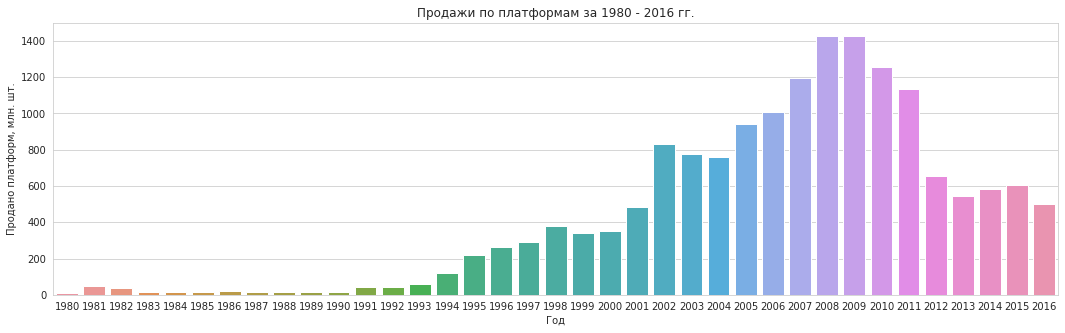

In [19]:
sns.set_style('whitegrid') # визиализируем данные
plt.figure(figsize=(18, 5))
sns.countplot(data = data, x='year_of_release')
plt.title("Продажи по платформам за 1980 - 2016 гг.")
plt.xlabel("Год")
plt.ylabel("Продано платформ, млн. шт.")
plt.show()

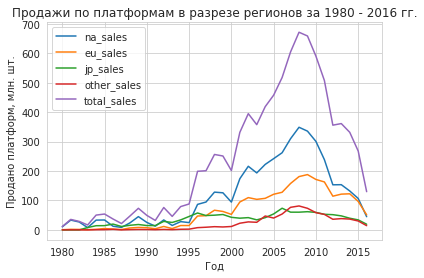

In [20]:
# визиализируем данные по продажам всего, в т.ч. в разрезе регионов
total_sales_data = data[[x for x in data.columns if 'sales' in x] + ['year_of_release']]
total_sales_data.groupby('year_of_release').sum().plot()
plt.title("Продажи по платформам в разрезе регионов за 1980 - 2016 гг.")
plt.xlabel("Год")
plt.ylabel("Продано платформ, млн. шт.")
plt.show()

#### Как мы можем наблюдать с 1980 до начала 90-х годов выпускалось с переменным успехом до 100 млн. игр ежегодно. Далее до 2008г. виден кратный рост спроса на консольные игры с пиком в 671 млн. игр за год. И с 2009 г. нисходящий тренд до 130 млн.  игр за 2016 г.

Можно допустить, что с 2008 г. консольные игры начали ощущать все более возрастающую конкуренцию не только со стороны ПК, но и мобильных игр.

Интересно, что тенденции продаж североамериканского, европейского и прочих рынков схожи, а вот спады и пики продаж на японском рынке не всегда повторяют общемировые тенденции.

Пока думаю до 1995 г. данные для анализа мы брать не будем. Это период становления индустрии консольных игр

### Cмотрим, как менялись продажи по платформам

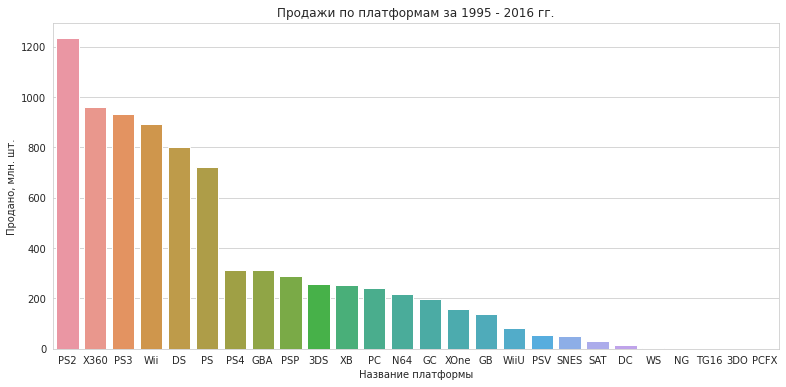

In [21]:
sample = data[data['year_of_release'] >= 1995]
# для дальнейшей диагностики выделим года, по которым будет оптимально анализировать динамику продаж
sample = sample.pivot_table(
                        index='platform', 
                        values='total_sales', 
                        aggfunc=sum).sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample.index,y=sample['total_sales'])
plt.title("Продажи по платформам за 1995 - 2016 гг.")
plt.xlabel("Название платформы")
plt.ylabel("Продано, млн. шт.")
plt.show()

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

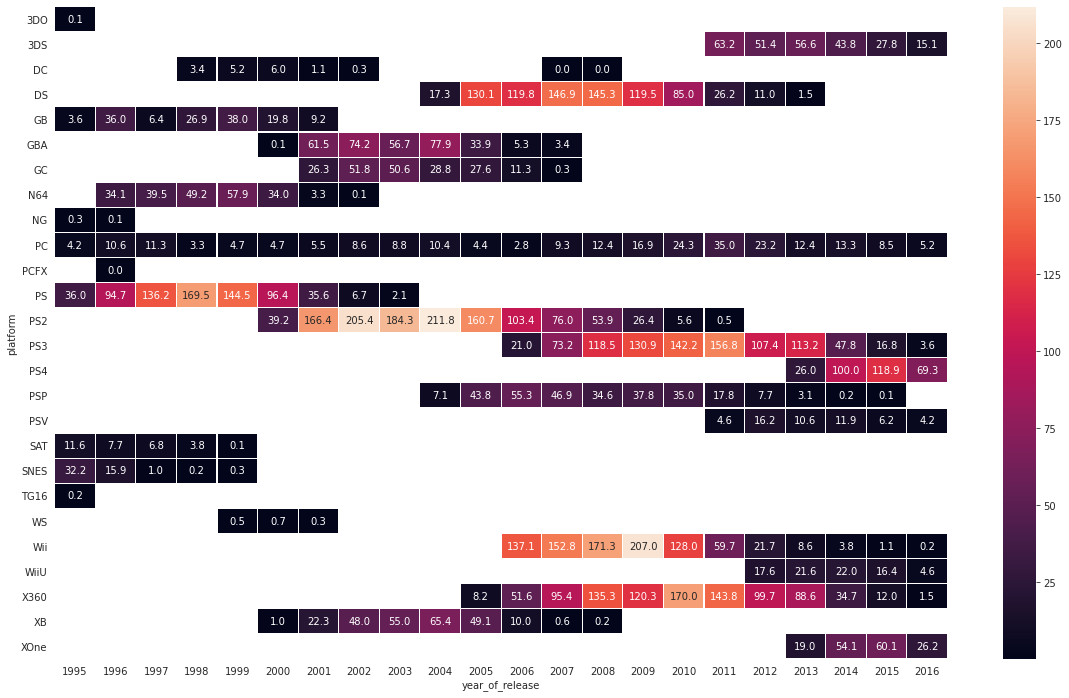

In [22]:
sample = data[data['year_of_release'] >= 1995] # визиализируем продажи тепловой картой
sample = sample.pivot_table(
                        index='platform', 
                        columns='year_of_release', 
                        values='total_sales', 
                        aggfunc=sum)
plt.figure(figsize = (20,12))
sns.heatmap(sample, annot=True, fmt=".1f", linewidths=.1)

In [23]:
# напишем функцию, которая будет возвращать нужную сводную таблицу и выводить данные с 1995 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] >= 1995)]
    total = slicee.pivot_table(
        index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

In [24]:
# мы видели, что резко выделяются по продажам 6 платформ, поэтому выведем продажи этих платформ
top_6_platforms = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(6)
top_6_platforms = top_6_platforms.reset_index().rename_axis(None, axis=1)
top_6_platforms.head(6)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


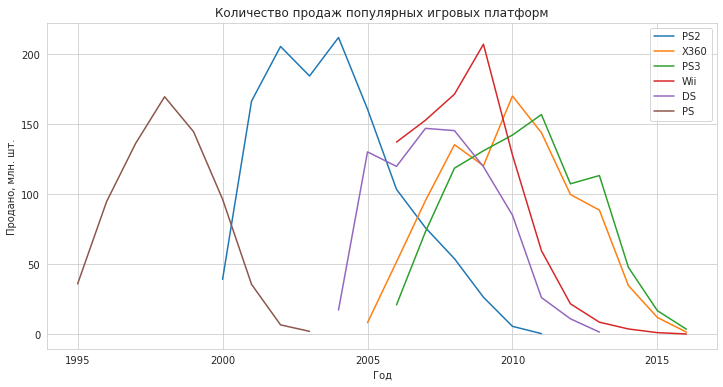

In [25]:
plt.figure(figsize=(12,6)) # визиализируем полученные данные
plt.title('Количество продаж популярных игровых платформ')
plt.xlabel('Год')
plt.ylabel('Продано, млн. шт.')

for i in list(top_6_platforms['platform']):
    sns.lineplot(data=year_total_sale_for_platform(i,data)['total_sales'], label=i)
    plt.legend()

#### Безусловный лидер продаж за 21 год - платформа PS2, расцвет которой пришелся на 2002-2004 гг. Всего платформа на рынке просуществовала 12 лет и было продано 1,2 млрд. копий.

Чуть менее коммерчески успешными стали такие платформы как X360, PS3, WII, DS, PS. Продажи составили от 728 млн. до 961 млн. копий. Итоговые продажи по остальным платформам составили менее 314 млн. копий.

Cамые продаваемые - это Sony Play Station и XBOX 360. Nintento WII резко стартовал в 2006-2009 годах и так же резко упал

У 6 наиболее коммерчески успешных платформ пик продаж наступил через 4-6 лет после выхода приставки

Практически все игровые платформы в среднем существуют по 9-12 лет.

Обращает на себя внимание самая "долгоиграющая" платформа РС, не самая продаваемая, но имеющая свой фанклуб.

Следует отметить, что в 2016 г. все без исключения платформы показали спад продаж. 

Потнциально прибыльными, наверное, ни одну из платформ назвать нельзя. Согласно тепловой карте можно отметить платформу PC, продажи которой с разной степенью успешности происходили на протяжении 21 года.

Можно также отметить PS4 и XOne, которые хотя и прошли пик популярности в 2015 г., но потенциально несколько лет еще будут пользоваться спросом.


### Строим график «ящик с усами» по глобальным продажам игр в разбивке по платформам

Для прогноза в такой динамично меняющейся индустрии, как компьютерные игры, думаю корректно взять 2-х летний период.

In [26]:
data_for_predict = data.query('year_of_release >= 2015')
data_for_predict.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1108.000000,1108.000000,1108.000000,1108.000000,1108.000000,457.000000,559.000000,1108.000000
mean,2015.453069,0.136995,0.133520,0.048195,0.040424,73.015317,6.649016,0.359134
std,0.498017,0.402121,0.432158,0.167160,0.133290,12.077499,1.623769,0.943111
min,2015.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.200000,0.010000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,67.000000,5.900000,0.030000
50%,2015.000000,0.010000,0.020000,0.010000,0.000000,74.000000,7.000000,0.080000
75%,2016.000000,0.090000,0.090000,0.040000,0.020000,81.000000,7.900000,0.260000
max,2016.000000,6.030000,6.120000,2.790000,2.380000,96.000000,9.300000,14.630000


In [27]:
all_platforms = data_for_predict.pivot_table(
                        index="platform",
                        values='total_sales',
                        aggfunc=sum).sort_values(by='total_sales', ascending=False)

all_platforms.head(10)

,total_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42
PC,13.77
X360,13.48
PSV,10.50
Wii,1.32


#### За период 2015-2016 гг. в индустрии продаж консольных игр наиболее успешно продавались платформы PS4, XOne и 3DS. 

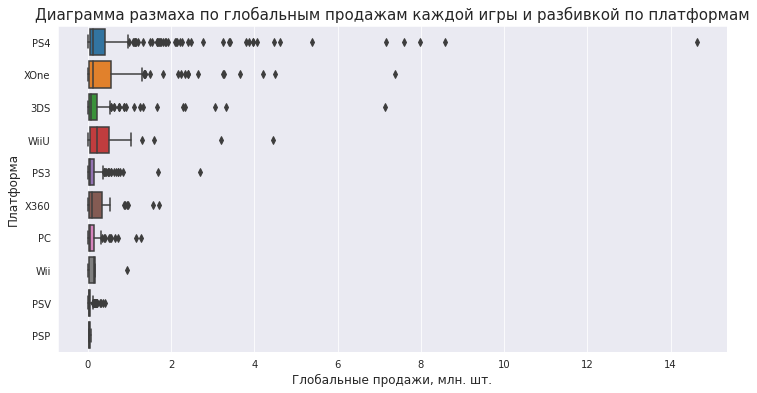

In [28]:
plt.figure(figsize=(12,6)) # построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам
sns.set_style('darkgrid')
sns.boxplot(data=data_for_predict, x='total_sales', y='platform')
plt.title('Диаграмма размаха по глобальным продажам каждой игры и разбивкой по платформам', fontsize=15)
plt.xlabel('Глобальные продажи, млн. шт.', fontsize=12)
plt.ylabel('Платформа',fontsize=12)
plt.show()

#### Наибольшие выбросы видим у PS4

Просмотрев общую диаграмму размаха мы видим частые выбросы и редкие. Данные выбросы предлагаю оставить, т.к. видимо есть игры, которые могли "стрельнуть" большими продажами.

Отрисуем "ящики с усами" по 3-м с нашей точки зрения наиболее перспективным платформам - PS4, XOne и PC. 

In [29]:
list_profitable = ['PS4','XOne','PC']
potential_profitable = data_for_predict[data_for_predict['platform'].isin(['PS4','XOne','PC'])]

In [30]:
potential_profitable['total_sales'].describe()

count    572.000000
mean       0.503864
std        1.194789
min        0.010000
25%        0.037500
50%        0.110000
75%        0.380000
max       14.630000
Name: total_sales, dtype: float64

In [31]:
potential_profitable.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PC,104.0,0.132404,0.209449,0.01,0.020,0.05,0.1425,1.28
PS4,301.0,0.625083,1.457063,0.01,0.050,0.12,0.4200,14.63
XOne,167.0,0.516707,0.965940,0.01,0.035,0.13,0.5550,7.39


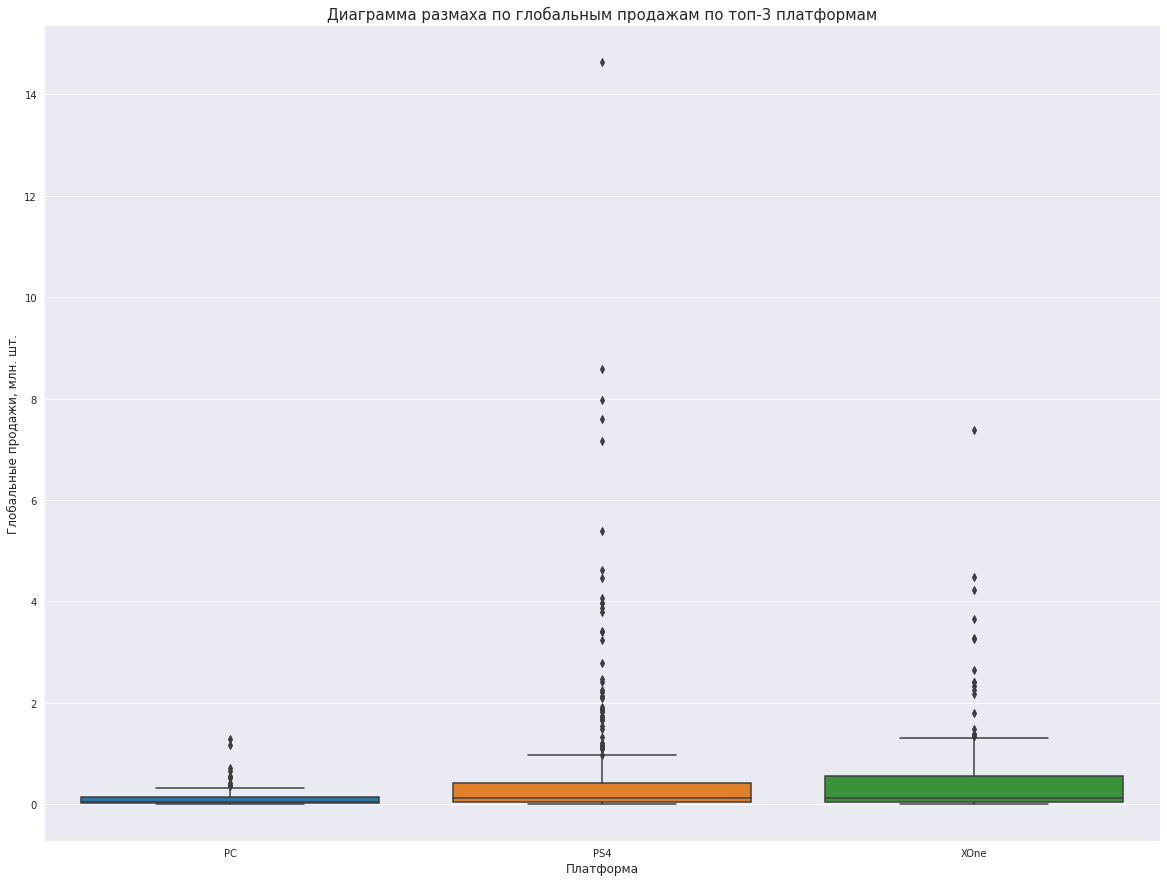

In [32]:
plt.figure(figsize=(20,15)) # построим общую диаграмму размаха по топ-3 платформам
sns.set_style('darkgrid')
sns.boxplot(data=potential_profitable, x='platform', y='total_sales', order=['PC', 'PS4', 'XOne'])
plt.title('Диаграмма размаха по глобальным продажам по топ-3 платформам', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи, млн. шт.',fontsize=12)
plt.show()

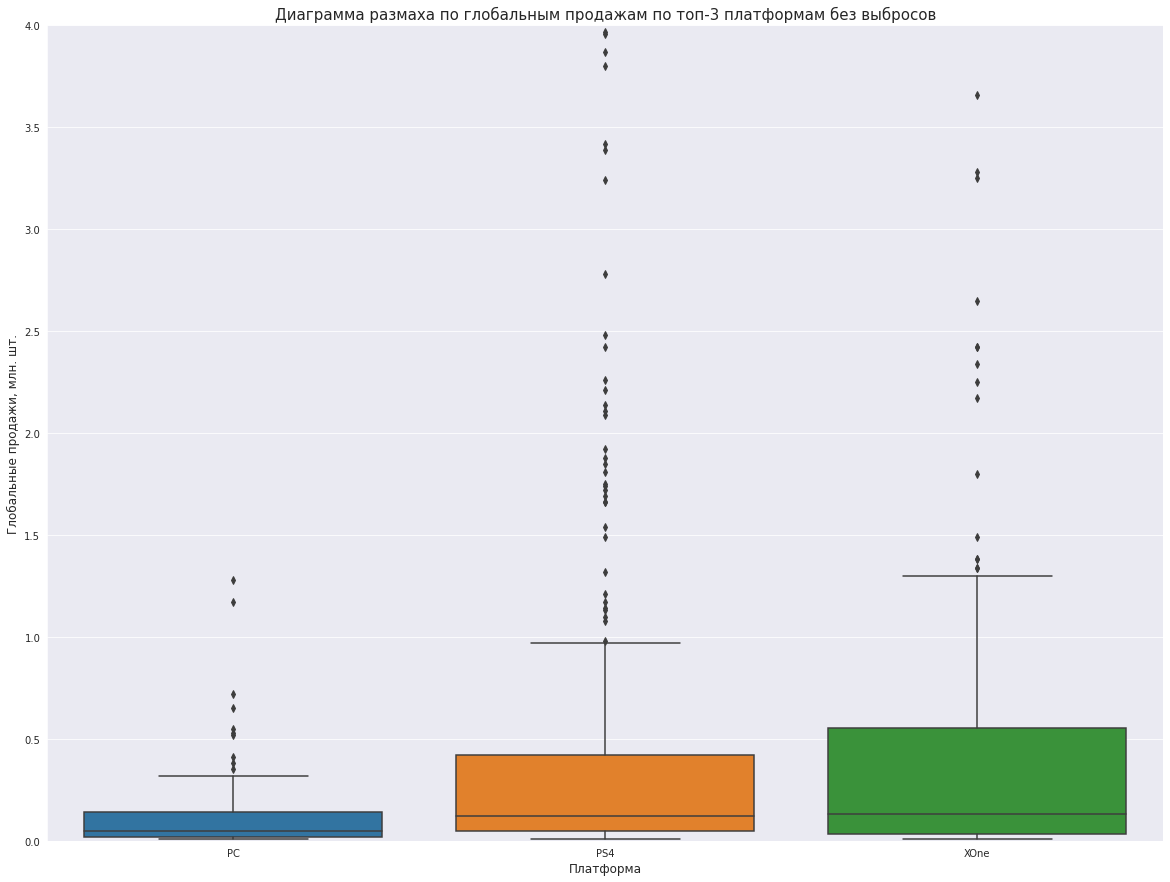

In [33]:
# теперь сузим диапазон до 5 млн продаж
plt.figure(figsize=(20,15)) # построим общую диаграмму размаха по топ-3 платформам
sns.set_style('darkgrid')
sns.boxplot(data=potential_profitable, x='platform', y='total_sales', order=['PC', 'PS4', 'XOne'])
plt.title('Диаграмма размаха по глобальным продажам по топ-3 платформам без выбросов', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи, млн. шт.',fontsize=12)
plt.ylim(0, 4)
plt.show()

#### Во всех 3-х случаях наблюдаем положительную ассиметрию, т.е. среднее больше медианы. Наблюдаем. что распределение Парето имеет длинный хвост вправо.  

### Посмотрим, как влияют на продажи платформ PS4, PC и XOne отзывы пользователей и критиков .

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

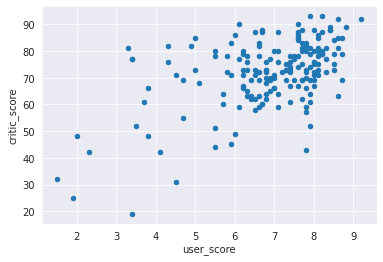

In [34]:
PS_4 = data_for_predict.query('platform == "PS4"') 
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы критиков и пользователей
PS_4.plot(x='user_score', y='critic_score', kind='scatter')

In [35]:
PS_4_cor = PS_4[['critic_score','user_score', 'total_sales']] # вычислим корреляционную матрицу в диапазоне [-1, 1]
# по коэффициенту корреляции Пирсона
PS_4_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.533330,0.392849
user_score,0.533330,1.000000,-0.059738
total_sales,0.392849,-0.059738,1.000000


In [36]:
PS_4_pass = PS_4[PS_4['user_score'] != -1] # создаем выгрузку без заглушек
PS_4_pass1 = PS_4_pass[PS_4_pass['critic_score'] != -1]
PS_4_pass1_cor = PS_4_pass1[['critic_score','user_score', 'total_sales']] # вычислим корреляционную матрицу без заглушек
PS_4_pass1_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.533330,0.392849
user_score,0.533330,1.000000,-0.059738
total_sales,0.392849,-0.059738,1.000000


#### По данным  таблицы можно сказать, что покупатели слабо прислушиваются к критикам (корреляция слабо положительная) и не прислушиваются к рейтингам игроков (корреляция слабо отрицательная). Здесь количество продаж не сильно зависит от оценок. 

Результаты корреляционной матрицы в диапазоне [-1, 1] кардинально не отличаются от приведенных.

Исследуем 2-е другие платформы 

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

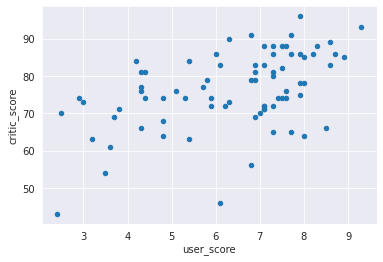

In [37]:
# выведем таблицу рассеивания по платформе PС, отобразив отзывы критиков и пользователей
PC = data_for_predict.query('platform == "PC"')
PC.plot(x='user_score', y='critic_score', kind='scatter')

In [38]:
PC_cor = PC[['critic_score','user_score', 'total_sales']] # вычислим корреляционную матрицу в диапазоне [-1, 1]
PC_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.482804,0.377332
user_score,0.482804,1.000000,0.150381
total_sales,0.377332,0.150381,1.000000


In [39]:
PC_pass = PC[PC['user_score'] != -1] # создаем выгрузку без заглушек
PC_pass1 = PC_pass[PC_pass['critic_score'] != -1]
PC_pass1_cor = PC_pass1[['critic_score','user_score', 'total_sales']] # вычислим корреляционную матрицу без заглушек
PC_pass1_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.482804,0.377332
user_score,0.482804,1.000000,0.150381
total_sales,0.377332,0.150381,1.000000


#### По данным таблицы можно сказать, что покупатели слабо прислушиваются и к критикам (корреляция слабо положительная) и к рейтингам игроков (корреляция слабо положительная). Здесь количество продаж практически не зависит от оценок.

Результаты корреляционной матрицы в диапазоне [-1, 1] кардинально не отличаются от приведенных.

<AxesSubplot:xlabel='user_score', ylabel='critic_score'>

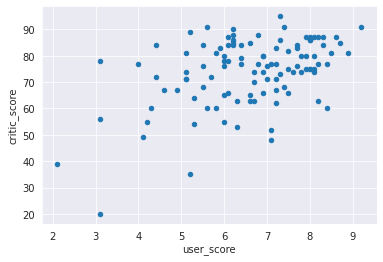

In [40]:
# выведем таблицу рассеивания по платформе XOne, отобразив отзывы критиков и пользователей
XOne = data_for_predict.query('platform == "XOne"')
XOne.plot(x='user_score', y='critic_score', kind='scatter')

In [41]:
XOne_cor = XOne[['critic_score','user_score', 'total_sales']] # вычислим корреляционную матрицу в диапазоне [-1, 1]
XOne_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.459443,0.430889
user_score,0.459443,1.000000,-0.041467
total_sales,0.430889,-0.041467,1.000000


In [42]:
XOne_pass = XOne[XOne['user_score'] != -1] # создаем выгрузку без заглушек
XOne_pass1 = XOne_pass[XOne_pass['critic_score'] != -1]
XOne_pass1_cor = XOne_pass1[['critic_score','user_score', 'total_sales']] # вычислим корреляционную матрицу без заглушек
XOne_pass1_cor.corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.459443,0.430889
user_score,0.459443,1.000000,-0.041467
total_sales,0.430889,-0.041467,1.000000


#### Аналогично с PS4 - покупатели умеренно прислушиваются к критикам (корреляция умеренно положительная) и игнорируют оценки игроков (корреляция слабо отрицательная). Количество продаж умеренно зависит от оценок критиков.
 
Результаты корреляционной матрицы в диапазоне [-1, 1] кардинально не отличаются от приведенных.

### Смотрим на общее распределение игр по жанрам с 2015 г.

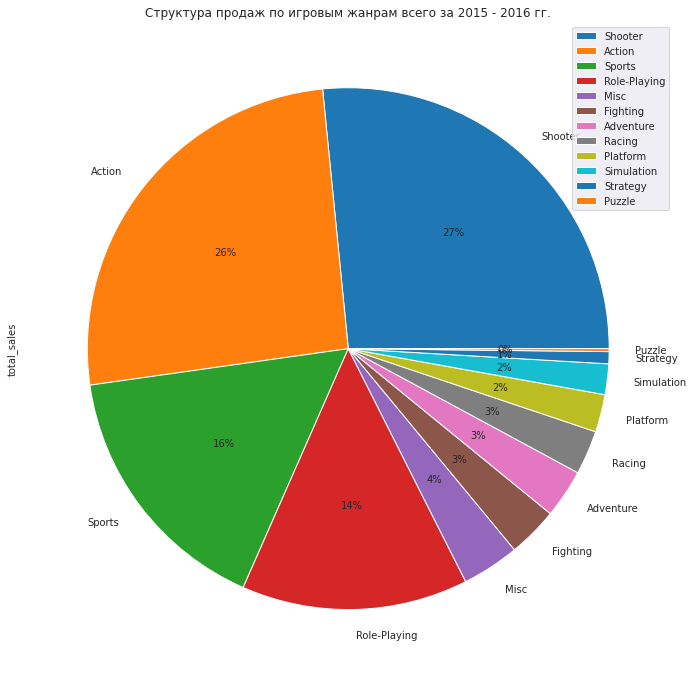

In [43]:
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра с 2015 г.
all_genres = data_for_predict.pivot_table(
                        index="genre",
                        values='total_sales',
                        aggfunc=sum).sort_values(by='total_sales', ascending=False).plot(
    kind='pie', y='total_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым жанрам всего за 2015 - 2016 гг.")
plt.show()

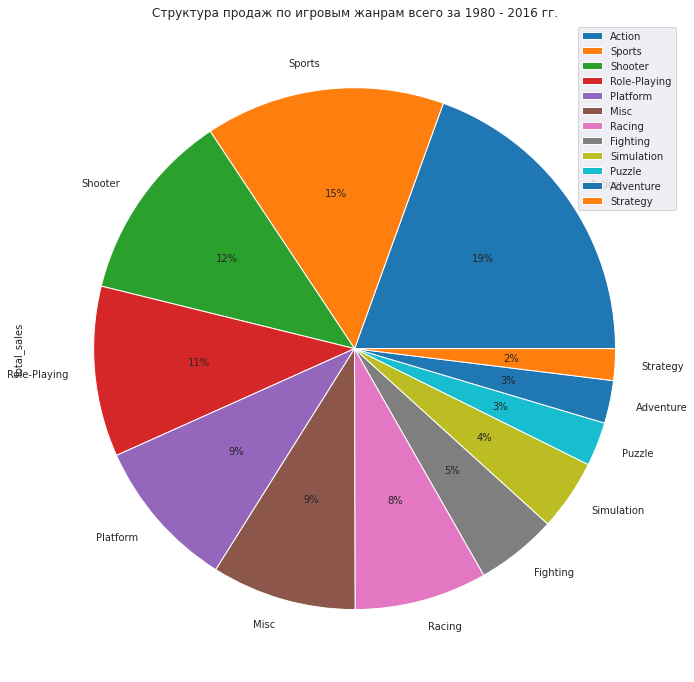

In [44]:
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра за весь период выборки
all_genres0 = data.pivot_table(
                        index="genre",
                        values='total_sales',
                        aggfunc=sum).sort_values(by='total_sales', ascending=False).plot(
    kind='pie', y='total_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым жанрам всего за 1980 - 2016 гг.")
plt.show()

In [45]:
# посчитаем продажи каждого жанра с 2015 г.
all_genres = data_for_predict.pivot_table(
                        index="genre",
                        values='total_sales',
                        aggfunc=sum).sort_values(by='total_sales', ascending=False)
all_genres.head(15)

,total_sales
genre,
Shooter,105.73
Action,102.13
Sports,64.33
Role-Playing,55.82
Misc,14.17
Fighting,12.37
Adventure,11.98
Racing,10.86
Platform,9.28


#### <font color='blue'>посчитаем средние или медианные продажи жанров, чтобы выяснить, какие жанры лучше продаются </font>  

In [46]:
# посчитаем среднее и медиану продаж каждого жанра с 2015 г.
all_genres = data_for_predict.pivot_table(
                        index="genre",
                        values='total_sales',
                        aggfunc=[np.mean, np.median])
display(all_genres)

,mean,median
,total_sales,total_sales
genre,,
Action,0.236961,0.060
Adventure,0.108909,0.030
Fighting,0.334324,0.090
Misc,0.199577,0.060
Platform,0.331429,0.100
Puzzle,0.102857,0.030
Racing,0.258571,0.055
Role-Playing,0.422879,0.115


#### Если рассмотреть выборку с 1980 г., то ТОП-5 жанров будет выглядеть следующим образом:
1. Action
2. Sports
3. Shooter
4. Role-Playing
5. Platform

В последние 2 года (2015-2016 гг.) потребительские предпочтения несколько изменились и ТОП-5 жанров выглядят так:
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Misc

В 5-ке коммерчески успешных жанров опустились на 1 позицию игры в стиле "экшн" (Action) и спортивные игры (Sports). 4 позиции потерял жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам, лазанье по лестницам, сбор предметов, необходимых для победы над врагами или завершения уровня (Platform).

Соответственно более коммерчески успешными стали "срелялки" (Shooter) и игры в жанре аркада, разрабатываемая Tinyware Games для платформы PC (Misc).

Таким образом, в промежутке 2015-2016 гг. лучше всего продаются игры в жанре Экшн (Shooter и Action) - 53% всех продаж. Хуже всех - Загадки и Стратегии. 

Вывод по жанру "Shooter" подтверждается также средними значениями и медианой. А вот на 2 и 3 местах игры в жанре "Sports" и "Role-Playing".

Сделать вывод о прибыльности жанров мы не можем, т.к. отсутствуют соответствующие данные

## Составим портрет пользователя каждого региона

Определим для пользователя каждого региона:

самые популярные платформы (топ-5)

самые популярные жанры (топ-5)

#### Начнем с пользователя Северной Америки

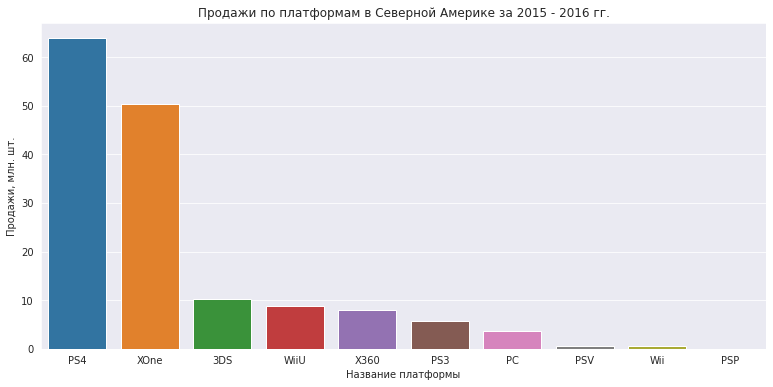

In [47]:
sample = data[data['year_of_release'] >= 2015]
sample = sample.pivot_table(
                        index="platform",  
                        values="na_sales", 
                        aggfunc=sum).sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample.index,y=sample['na_sales'])
plt.title("Продажи по платформам в Северной Америке за 2015 - 2016 гг.")
plt.xlabel("Название платформы")
plt.ylabel("Продажи, млн. шт.")
plt.show()

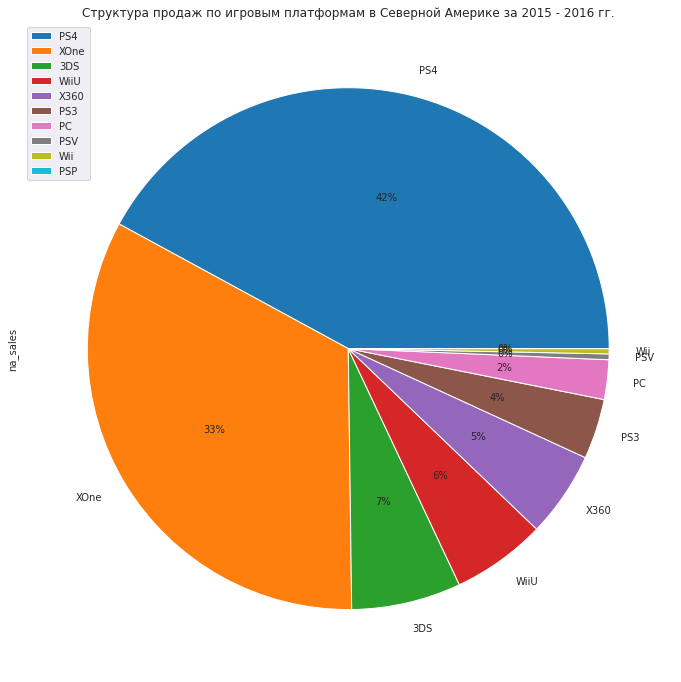

In [48]:
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_na_platform = sample.pivot_table(
                        index="platform",
                        values='na_sales',
                        aggfunc=sum).sort_values(by='na_sales', ascending=False).plot(
    kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым платформам в Северной Америке за 2015 - 2016 гг.")
plt.show()

In [49]:
sample.query('platform')
sample.head(15)

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05
PS3,5.66
PC,3.72
PSV,0.54
Wii,0.49


### В Северной Америке ТОП-5 платформ по доле рынка продаж и проданных копиях выглядят так:
1. PS4(42%) - 63,86 млн. шт.
2. XOne(33%) - 50,30 млн. шт.
3. 3DS(7%) - 10,31 млн. шт.
4. WiiU(6%) - 8,86 млн. шт.
5. Х360(5%) - 8,05 млн. шт.


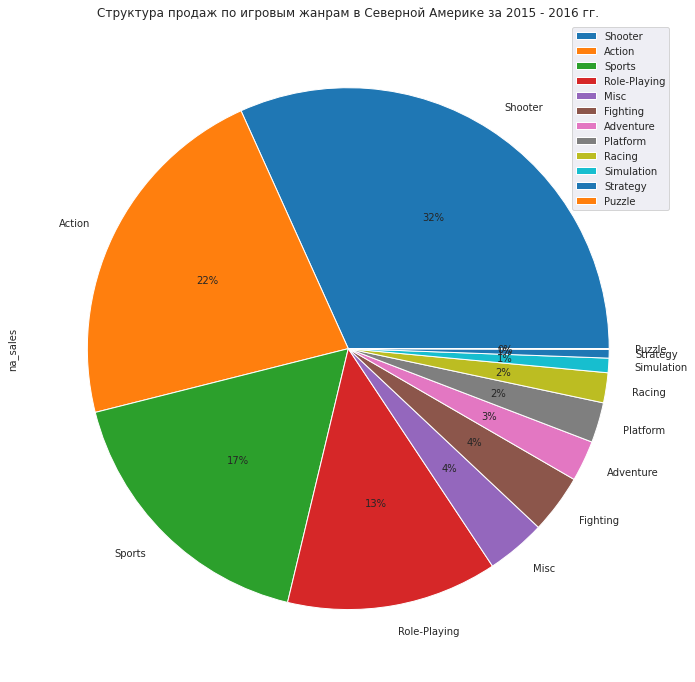

In [50]:
sample = data[data['year_of_release'] >= 2015]
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_na_platform = sample.pivot_table(
                        index="genre",
                        values='na_sales',
                        aggfunc=sum).sort_values(by='na_sales', ascending=False).plot(
    kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым жанрам в Северной Америке за 2015 - 2016 гг.")
plt.show()

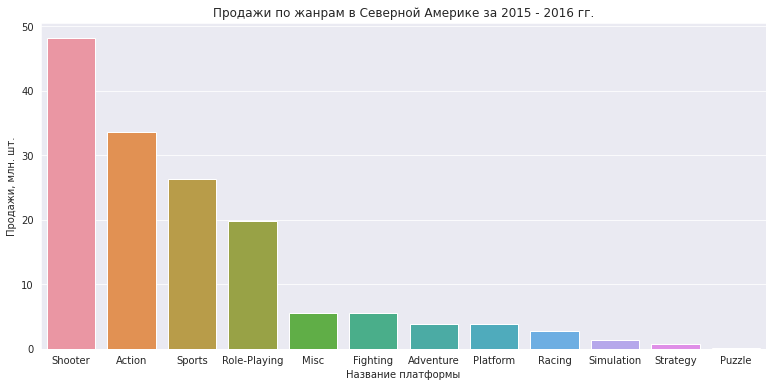

In [51]:
sample = sample.pivot_table(
                        index="genre",  
                        values="na_sales", 
                        aggfunc=sum).sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample.index,y=sample['na_sales'])
plt.title("Продажи по жанрам в Северной Америке за 2015 - 2016 гг.")
plt.xlabel("Название платформы")
plt.ylabel("Продажи, млн. шт.")
plt.show()

In [52]:
sample.query('genre')
sample.head(15)

,na_sales
genre,
Shooter,48.18
Action,33.68
Sports,26.31
Role-Playing,19.82
Misc,5.58
Fighting,5.54
Adventure,3.84
Platform,3.78
Racing,2.82


##### В Северной Америке ТОП-5 жанров по доле рынка продаж и проданным копиям выглядят так (2015-2016 гг.): 

1. Shooter(32%) - 48,18 млн.шт.
2. Action(22%) - 33,68 млн.шт.
3. Sports(17%) - 26,31 млн.шт.
4. Role-playing(13%) - 19,82 млн.шт.
5. Misc(4%) - 5,58 млн.шт.

#### Пользователь Европы

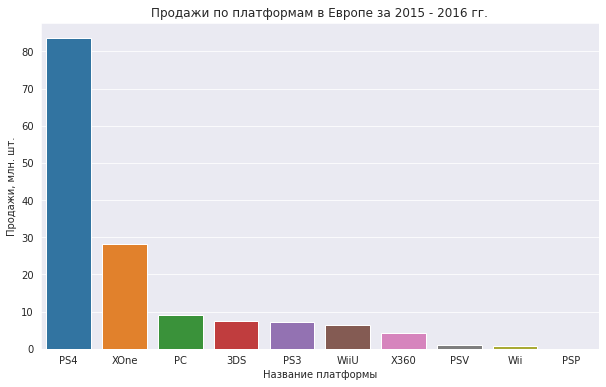

In [53]:
sample1 = data[data["year_of_release"] >= 2015]

sample1 = sample1.pivot_table(
                        index="platform",  
                        values="eu_sales", 
                        aggfunc=sum).sort_values(by="eu_sales", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sample1.index,y=sample1["eu_sales"])
plt.title("Продажи по платформам в Европе за 2015 - 2016 гг.")
plt.xlabel("Название платформы")
plt.ylabel("Продажи, млн. шт.")
plt.show()


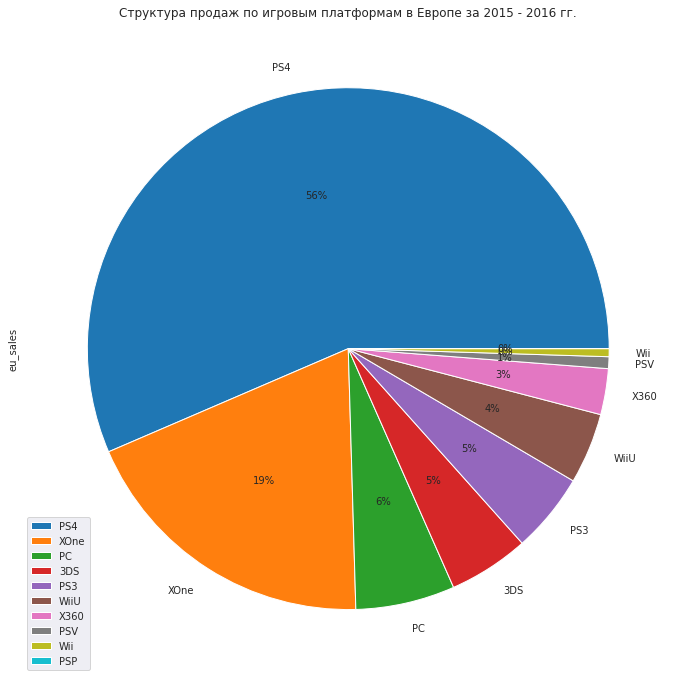

In [54]:
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_eu_platform = sample1.pivot_table(
                        index="platform",
                        values='eu_sales',
                        aggfunc=sum).sort_values(by='eu_sales', ascending=False).plot(
    kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым платформам в Европе за 2015 - 2016 гг.")
plt.show()

In [55]:
sample1 = sample1.pivot_table(
                        index="platform",  
                        values="eu_sales", 
                        aggfunc=sum).sort_values(by="eu_sales", ascending=False)
sample1.head(10)

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30
WiiU,6.49
X360,4.21
PSV,1.08
Wii,0.73


#### В Европе ТОП-5 платформ по доле рынка продаж и проданных копиях выглядят так:
1. PS4(56%) - 83,54 млн. шт.
2. XOne(19%) - 28,10 млн. шт.
3. PС(6%) - 9,10 млн. шт.
4. 3DS(5%) - 7,39 млн. шт.
5. PS3(5%) - 7,30 млн. шт.

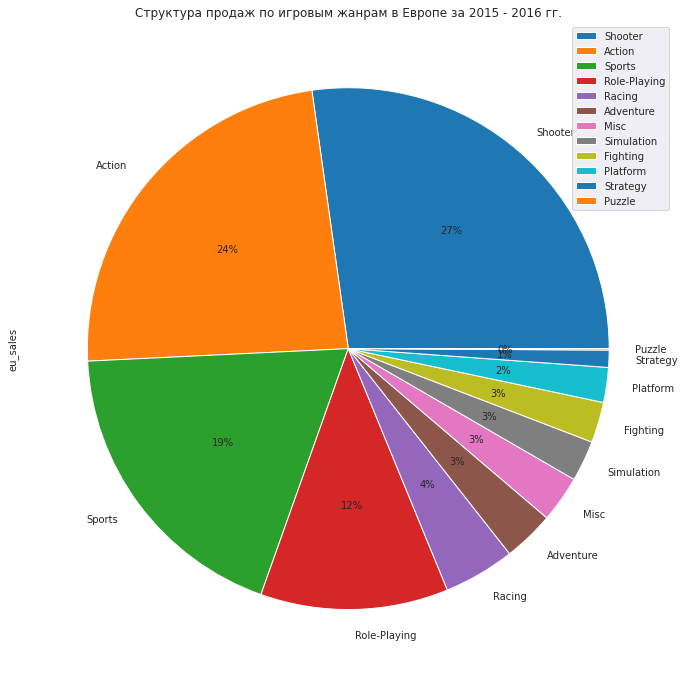

In [56]:
sample1 = data[data["year_of_release"] >= 2015]
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_eu_platform = sample1.pivot_table(
                        index="genre",
                        values='eu_sales',
                        aggfunc=sum).sort_values(by='eu_sales', ascending=False).plot(
    kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым жанрам в Европе за 2015 - 2016 гг.")
plt.show()

In [57]:
sample1 = sample1.pivot_table(
                        index="genre",  
                        values="eu_sales", 
                        aggfunc=sum).sort_values(by="eu_sales", ascending=False)
sample1.head(15)

,eu_sales
genre,
Shooter,40.28
Action,34.82
Sports,27.82
Role-Playing,17.21
Racing,6.52
Adventure,4.67
Misc,4.26
Simulation,3.74
Fighting,3.72


### В Европе ТОП-5 жанров по доле рынка продаж и проданным копиям выглядят так (2009-2016 гг.): 

1. Shooter (27%) - 40,28 млн.шт.
2. Action(24%) - 34,82 млн.шт.
3. Sports(19%) - 27,82 млн.шт.
4. Role-Playing(12%) - 17,21 млн.шт.
5. Racing	(4%) - 6,52 млн.шт.

### Портрет пользователя Японии

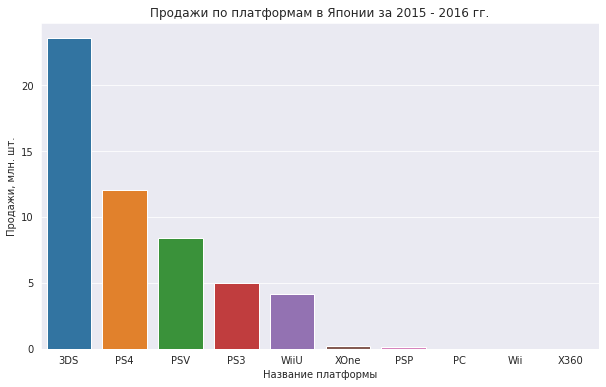

In [58]:
sample2 = data[data["year_of_release"] >= 2015]

sample2 = sample2.pivot_table(
                        index="platform",  
                        values="jp_sales", 
                        aggfunc=sum).sort_values(by="jp_sales", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sample2.index,y=sample2["jp_sales"])
plt.title("Продажи по платформам в Японии за 2015 - 2016 гг.")
plt.xlabel("Название платформы")
plt.ylabel("Продажи, млн. шт.")
plt.show()

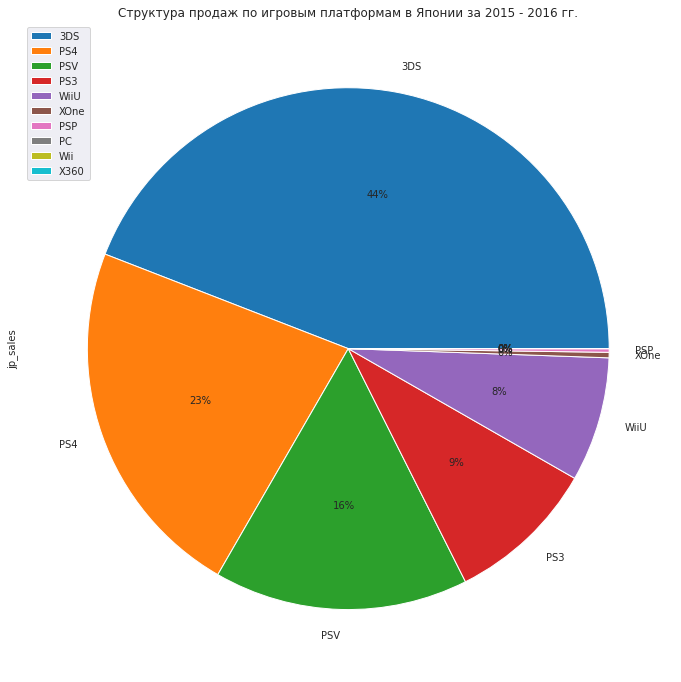

In [59]:
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_jp_platform = sample2.pivot_table(
                        index="platform",
                        values='jp_sales',
                        aggfunc=sum).sort_values(by='jp_sales', ascending=False).plot(
    kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым платформам в Японии за 2015 - 2016 гг.")
plt.show()

In [60]:
sample2 = data[data["year_of_release"] >= 2015]
sample2 = sample2.pivot_table(
                        index="platform",  
                        values="jp_sales", 
                        aggfunc=sum).sort_values(by="jp_sales", ascending=False)
sample2.head(10)

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12
XOne,0.18
PSP,0.12
PC,0.00
Wii,0.00


### В Японии ТОП-5 платформ по доле рынка продаж и проданных копиях выглядят так:
1. 3DS(44%) - 23,55 млн. шт.
2. PS4(23%) - 12,05 млн. шт.
3. PSV	(16%) - 8,41 млн. шт.
4. PS3(9%) - 4,97 млн. шт.
5. WiiU(8%) - 4,12 млн. шт.

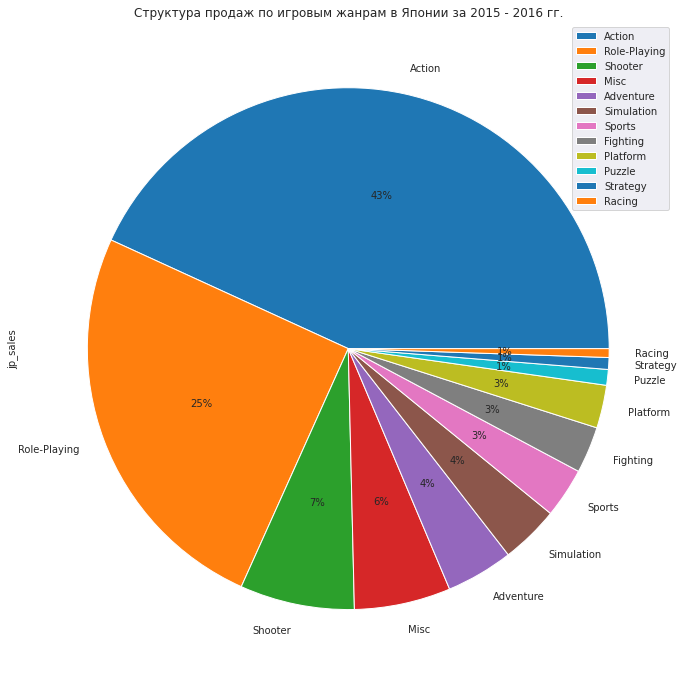

In [61]:
sample2 = data[data["year_of_release"] >= 2015]
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_jp_platform = sample2.pivot_table(
                        index="genre",
                        values='jp_sales',
                        aggfunc=sum).sort_values(by='jp_sales', ascending=False).plot(
    kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым жанрам в Японии за 2015 - 2016 гг.")
plt.show()

In [62]:
sample2 = sample2.pivot_table(
                        index="genre",  
                        values="jp_sales", 
                        aggfunc=sum).sort_values(by="jp_sales", ascending=False)
sample2.head(15)

,jp_sales
genre,
Action,23.05
Role-Playing,13.41
Shooter,3.79
Misc,3.19
Adventure,2.22
Simulation,1.93
Sports,1.65
Fighting,1.54
Platform,1.42


### В Японии ТОП-5 жанров по доле рынка продаж и проданным копиям выглядят так (2015-2016 гг.): 

1. Action(43%) - 23,05 млн.шт.
2. Role-Playing(25%) - 13,41 млн.шт.
3. Shooter(7%) - 3,79 млн.шт.
4. Misc(6%) - 3,19 млн.шт.
5. Adventure(4%) - 2,22 млн.шт.

### Портрет пользователя из прочих регионов мира

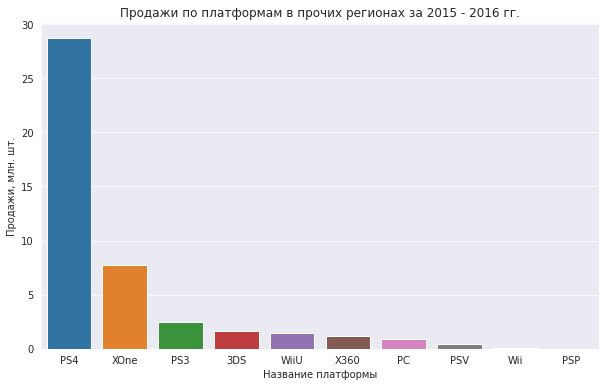

In [63]:
sample3 = data[data["year_of_release"] >= 2015]

sample3 = sample3.pivot_table(
                        index="platform",  
                        values="other_sales", 
                        aggfunc=sum).sort_values(by="other_sales", ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=sample3.index,y=sample3["other_sales"])
plt.title("Продажи по платформам в прочих регионах за 2015 - 2016 гг.")
plt.xlabel("Название платформы")
plt.ylabel("Продажи, млн. шт.")
plt.show()

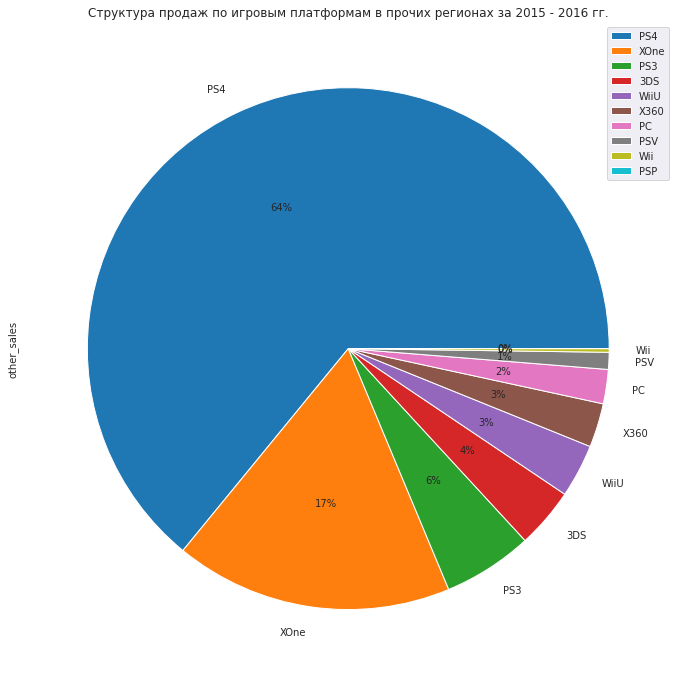

In [64]:
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_other_platform = sample3.pivot_table(
                        index="platform",
                        values='other_sales',
                        aggfunc=sum).sort_values(by='other_sales', ascending=False).plot(
    kind='pie', y='other_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым платформам в прочих регионах за 2015 - 2016 гг.")
plt.show()

In [65]:
sample3 = data[data["year_of_release"] >= 2015]
sample3 = sample3.pivot_table(
                        index="platform",  
                        values="other_sales", 
                        aggfunc=sum).sort_values(by="other_sales", ascending=False)
sample3.head(10)

,other_sales
platform,
PS4,28.70
XOne,7.71
PS3,2.49
3DS,1.67
WiiU,1.48
X360,1.22
PC,0.95
PSV,0.47
Wii,0.10


#### В прочих регионах ТОП-5 платформ по доле рынка продаж и проданных копиях выглядят так:
1. PS4(64%) - 28,70 млн. шт.
2. XOne	(17%) - 7,71 млн. шт.
3. PS3(6%) - 2,49 млн. шт.
4. 3DS(4%) - 1,67 млн. шт.
5. WiiU(3%) - 1,48 млн. шт.

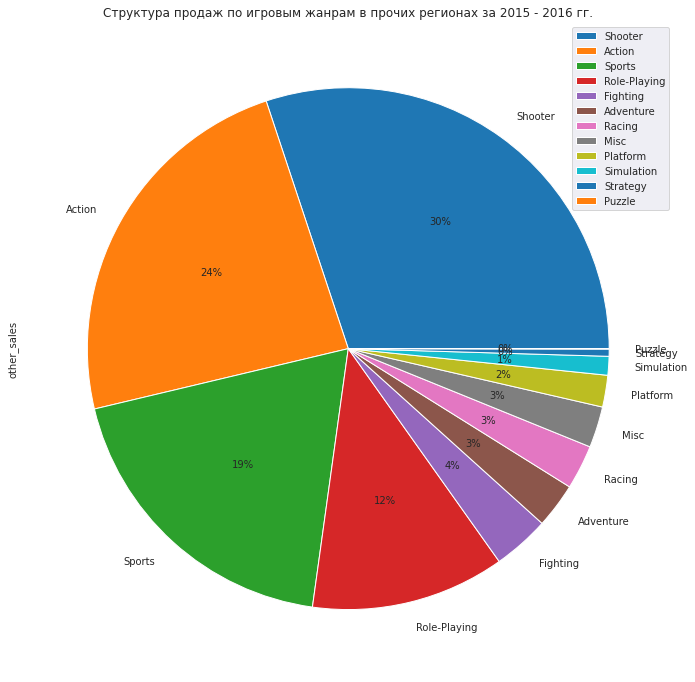

In [66]:
sample3 = data[data["year_of_release"] >= 2015]
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
all_other_platform = sample3.pivot_table(
                        index="genre",
                        values='other_sales',
                        aggfunc=sum).sort_values(by='other_sales', ascending=False).plot(
    kind='pie', y='other_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж по игровым жанрам в прочих регионах за 2015 - 2016 гг.")
plt.show()

In [67]:
sample3 = sample3.pivot_table(
                        index="genre",  
                        values="other_sales", 
                        aggfunc=sum).sort_values(by="other_sales", ascending=False)
sample3.head(15)

,other_sales
genre,
Shooter,13.48
Action,10.58
Sports,8.55
Role-Playing,5.38
Fighting,1.57
Adventure,1.25
Racing,1.23
Misc,1.14
Platform,0.88


### В прочих регионах ТОП-5 жанров по доле рынка продаж и проданным копиям выглядят так: 

1. Shooter(30%) - 13,48 млн.шт.
2. Action(24%) - 10,58 млн.шт.
3. Sports(19%) - 8,55 млн.шт.
4. Role-Playing(12%) - 5,38 млн.шт.
5. Fighting(4%) - 1,57 млн.шт.

In [68]:
sample3 = data[data["year_of_release"] >= 2015]
# посчитаем емкость рынка по всем регионам
sample3 = sample3.pivot_table(
                        index="platform",  
                        values=["na_sales", "eu_sales", "jp_sales", "other_sales", "total_sales"],
                        aggfunc=sum,
                        margins=True)
sample3['eu_share'] = sample3['eu_sales'] / sample3['total_sales']*100 # посчитаем долю рынка по регионам
sample3['jp_share'] = sample3['jp_sales'] / sample3['total_sales']*100
sample3['na_share'] = sample3['na_sales'] / sample3['total_sales']*100
sample3['other_share'] = sample3['other_sales'] / sample3['total_sales']*100
sample3.tail(1) # выведем итоги

,eu_sales,jp_sales,na_sales,other_sales,total_sales,eu_share,jp_share,na_share,other_share
platform,,,,,,,,,
All,147.94,53.4,151.79,44.79,397.92,37.178327,13.419783,38.145858,11.256031


#### В 2015-2016 по объему продаж можно выделить 2 макрорегиона. Рынки Северной Америки и Европы практически равны - 151,79 млн. копий (или 38,1% всего объема продаж) и 147,94 млн. копий (37,2%) соответственно. Япония - 53,40 млн. копий (13,42%) и прочие регионы - 44.79 млн. копий (11,26%).

#### Рассмотрим вопрос: влияет ли рейтинг ESRB на продажи в отдельном регионе? 

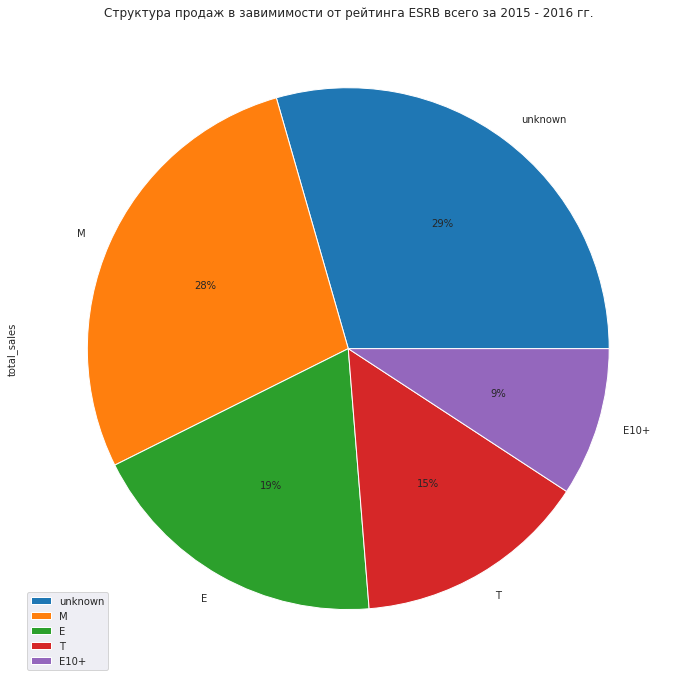

In [69]:
sample3 = data[data["year_of_release"] >= 2015]
# создадим круговую диаграмму и посчитаем долю в продажах каждого жанра
rating = sample3.pivot_table(
                        index="rating",
                        values='total_sales',
                        aggfunc=sum).sort_values(by='total_sales', ascending=False).plot(
    kind='pie', y='total_sales', autopct='%1.0f%%', figsize=(15,12))
plt.title("Структура продаж в завимимости от рейтинга ESRB всего за 2015 - 2016 гг.")
plt.show()

#### Напомним, что рейтинг 'unknown' мы присвоили тем играм, у которых отсутствовали какие-либо рейтинги. Также игры с рейтингом «E» («Everyone») — это «Для всех» (Содержание этих игр подходит для всех возрастов). Рейтинг «T» («Teen») — «Подросткам» (игра подходит для лиц от 13 лет) и «M» («Mature») — это «Для взрослых» (материалы игры не подходят для лиц младше 17 лет). 

Глядя на график видно, что наибольшая доля рынка у игр с рейтингом 'unknown' - 29%, «М» - 28%, "Е" - 19%,  "Т" - 15%. 

#### Создадим диаграммы разброса продаж в разных регионах в зависимости от рейтингов

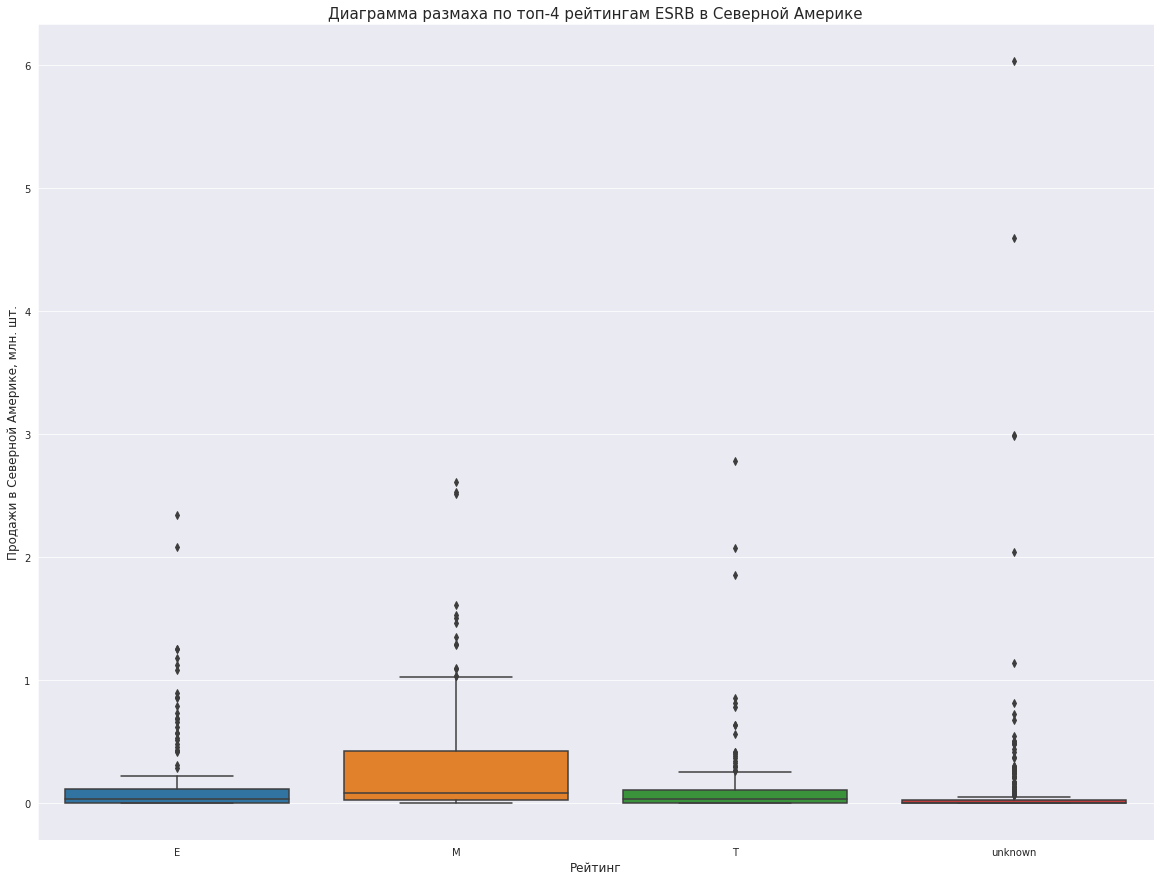

In [70]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) # построим общую диаграмму размаха по топ-4 рейтингам в Северной Америке
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='na_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в Северной Америке', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Северной Америке, млн. шт.',fontsize=12)
plt.show()

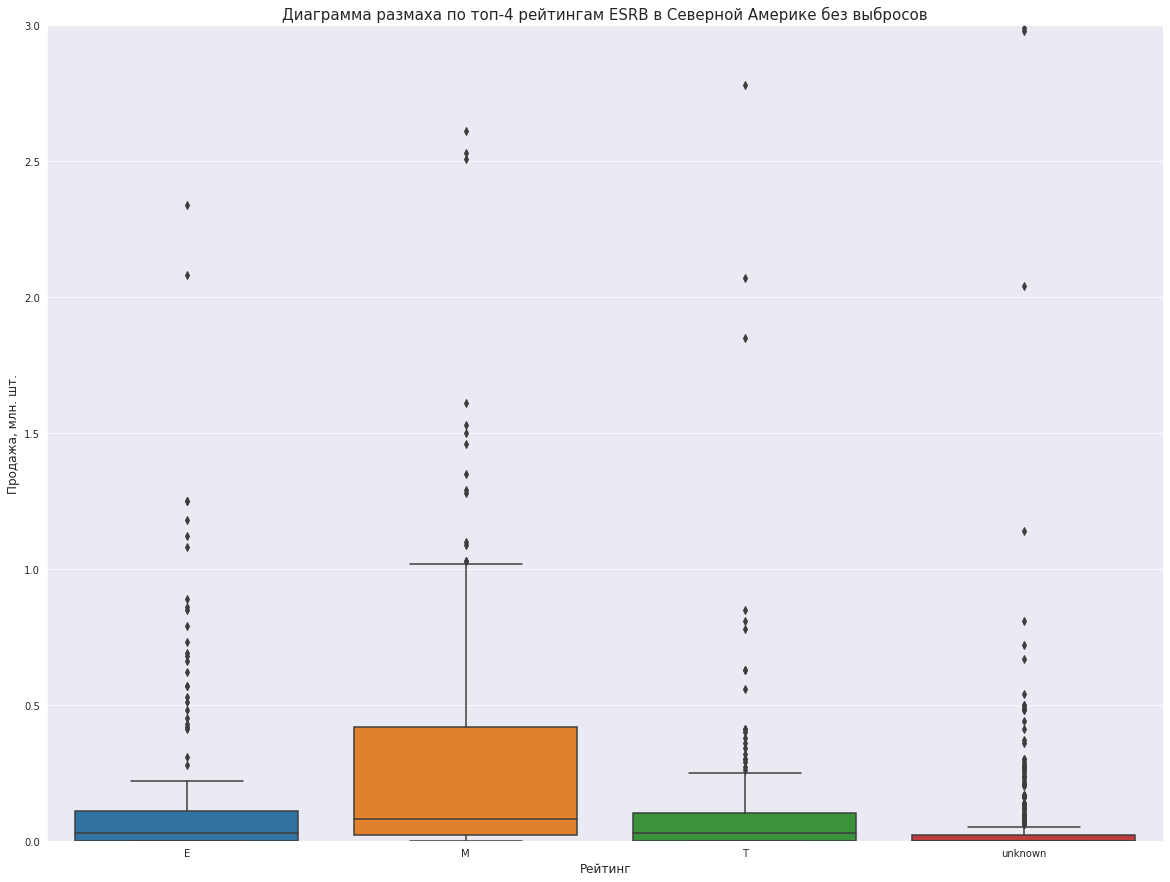

In [71]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) 
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='na_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в Северной Америке без выбросов', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажа, млн. шт.',fontsize=12)
plt.ylim(0, 3) # ограничим выбросы
plt.show()

#### Каждый прямоугольник представляет распределение продаж в различных рейтингах. 

Глядя на медианы, кажется, что в Северной Америке игры с рейтингом "М" являются более продаваемыми; игры с рейтингами "Е" и "Т"  - менее продаваемые. Не влияет на продажи -'unknown'.

Глядя на размеры ящиков, кажется, что рейтинг "М" также имеют наибольший разброс в продажах.

Эти графики также показывают, насколько искажено распределение продаж; то есть большие объемы продаж намного дальше от медианы, чем меньшие объемы.

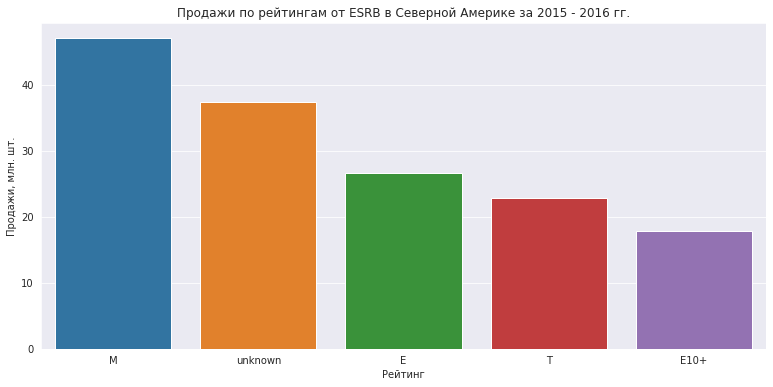

In [72]:
sample3 = data[data['year_of_release'] >= 2015]
sample3 = sample3.pivot_table(
                        index="rating",  
                        values="na_sales", 
                        aggfunc=sum).sort_values(by='na_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample3.index,y=sample3['na_sales'])
plt.title("Продажи по рейтингам от ESRB в Северной Америке за 2015 - 2016 гг.")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн. шт.")
plt.show()

#### Видим, что в Северной Америке наибольшие продажи у игр с рейтингом "М", "unknown" (за счет выбросов), «E», "Т". 

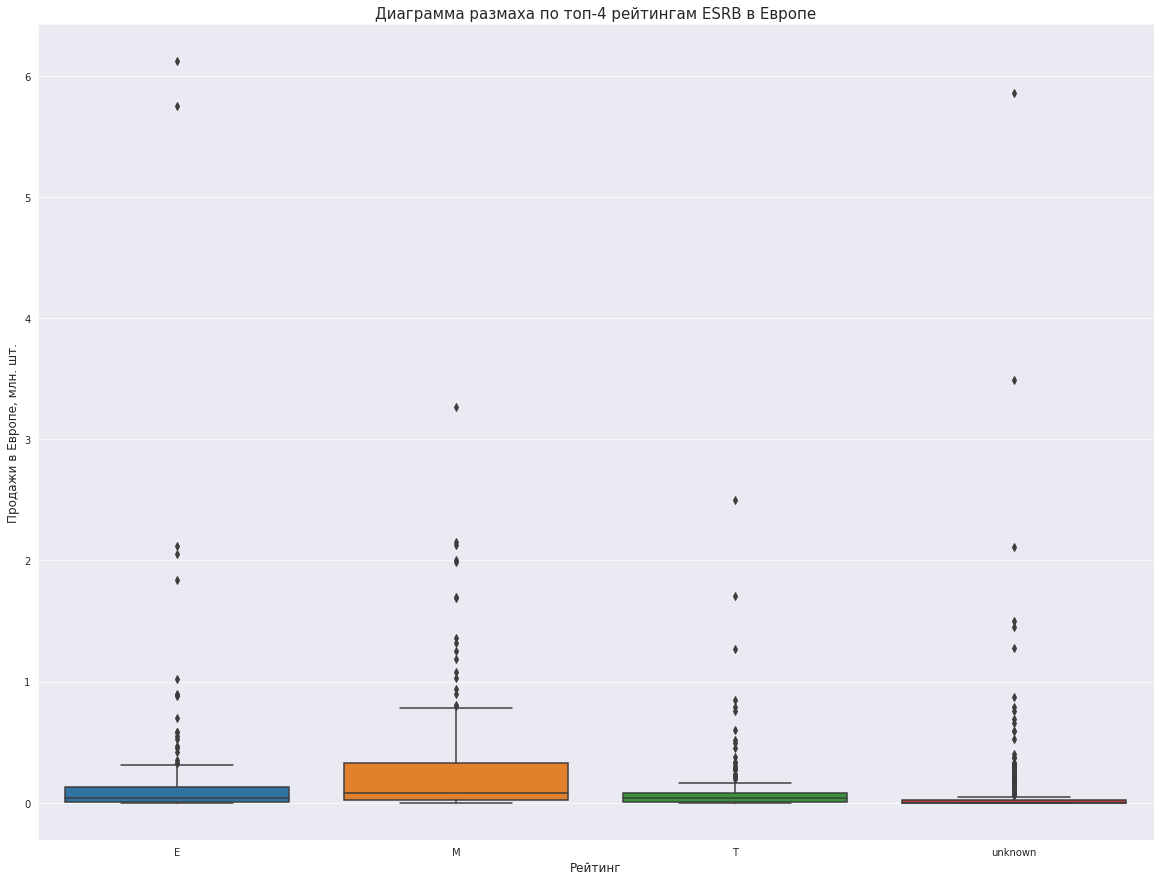

In [73]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) # построим общую диаграмму размаха по топ-4 рейтингам в Европе
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='eu_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в Европе', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Европе, млн. шт.',fontsize=12)
plt.show()

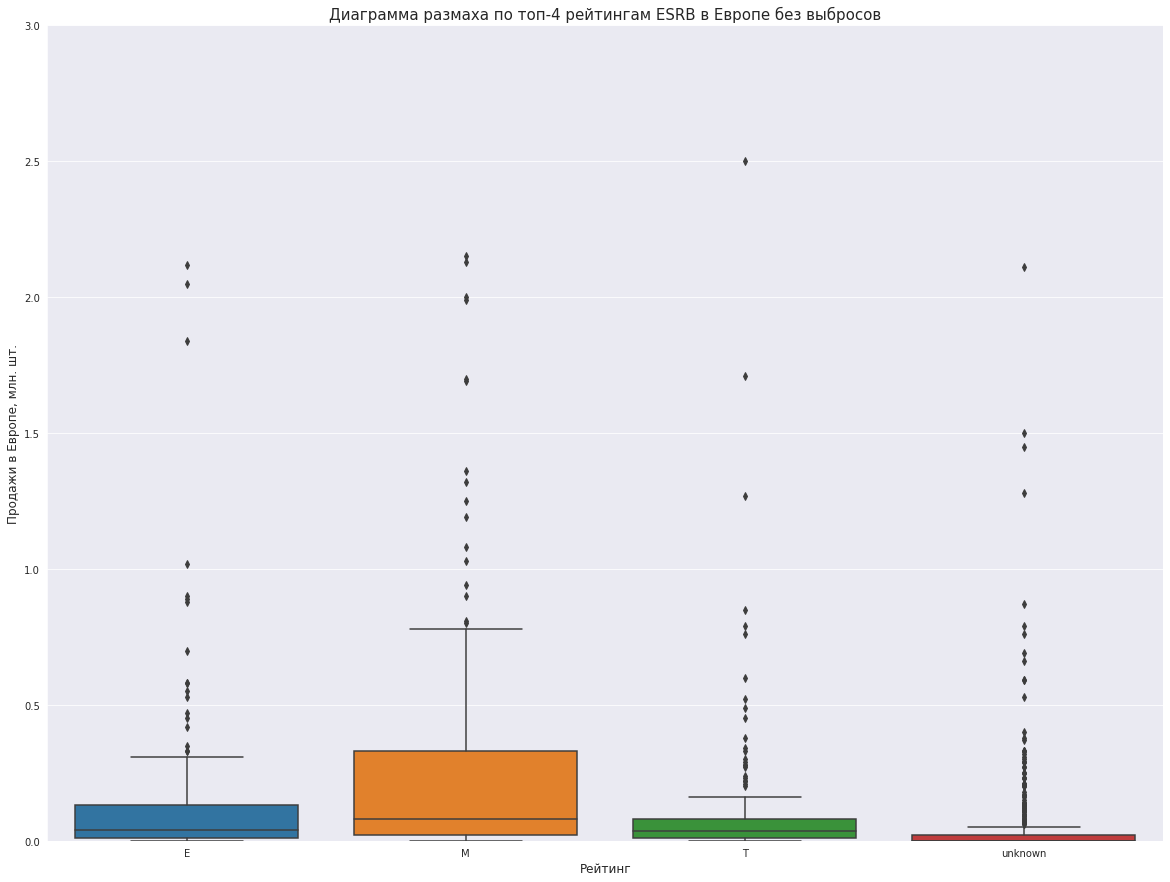

In [74]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) 
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='eu_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в Европе без выбросов', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Европе, млн. шт.',fontsize=12)
plt.ylim(0, 3) # ограничим выбросы
plt.show()

#### Глядя на медианы, кажется, что в Европе игры с рейтингом "М" также являются более продаваемыми; игры с рейтингами "Е", "Т" и 'unknown' менее продаваемые.

Глядя на размеры ящиков, кажется, что рейтинг "Т" также имеют наибольший разброс в продажах.

В Европе также большие объемы продаж намного дальше от медианы, чем меньшие объемы.

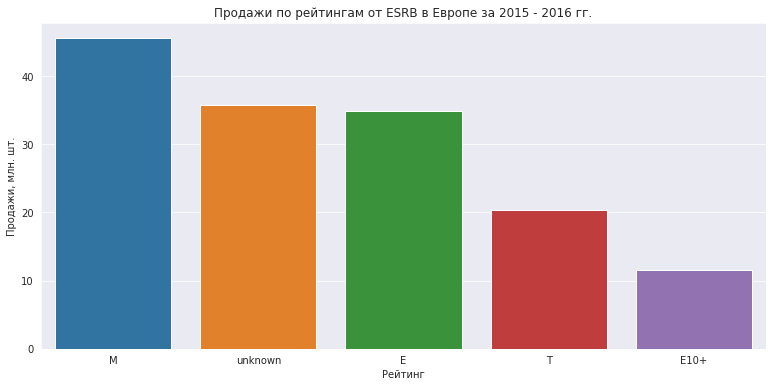

In [75]:
sample3 = data[data['year_of_release'] >= 2015]
sample3 = sample3.pivot_table(
                        index="rating",  
                        values="eu_sales", 
                        aggfunc=sum).sort_values(by='eu_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample3.index,y=sample3['eu_sales'])
plt.title("Продажи по рейтингам от ESRB в Европе за 2015 - 2016 гг.")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн. шт.")
plt.show()

#### Видим, что в Европе ситуация аналогична североамериканской. Наибольшие продажи у игр с рейтингом "М".

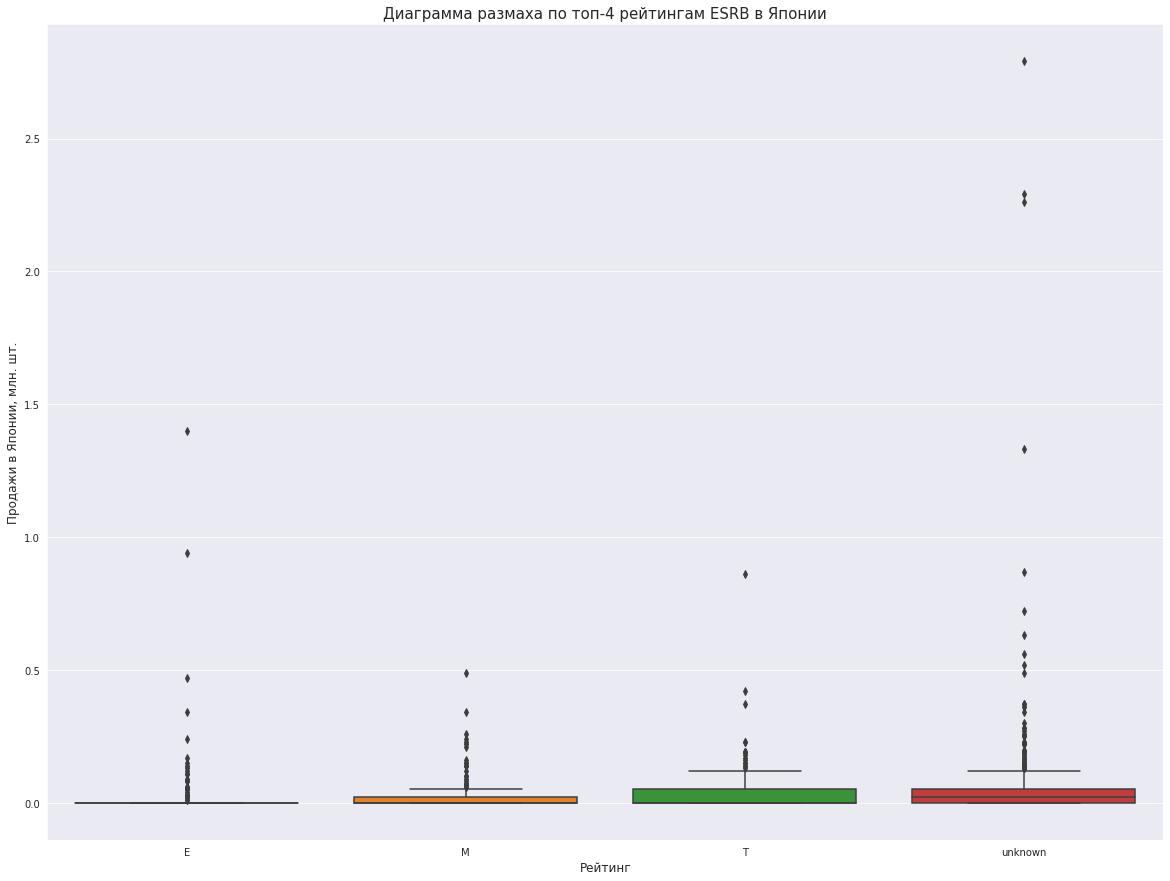

In [76]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) # построим общую диаграмму размаха по топ-4 рейтингам в Японии
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='jp_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в Японии', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Японии, млн. шт.',fontsize=12)
plt.show()

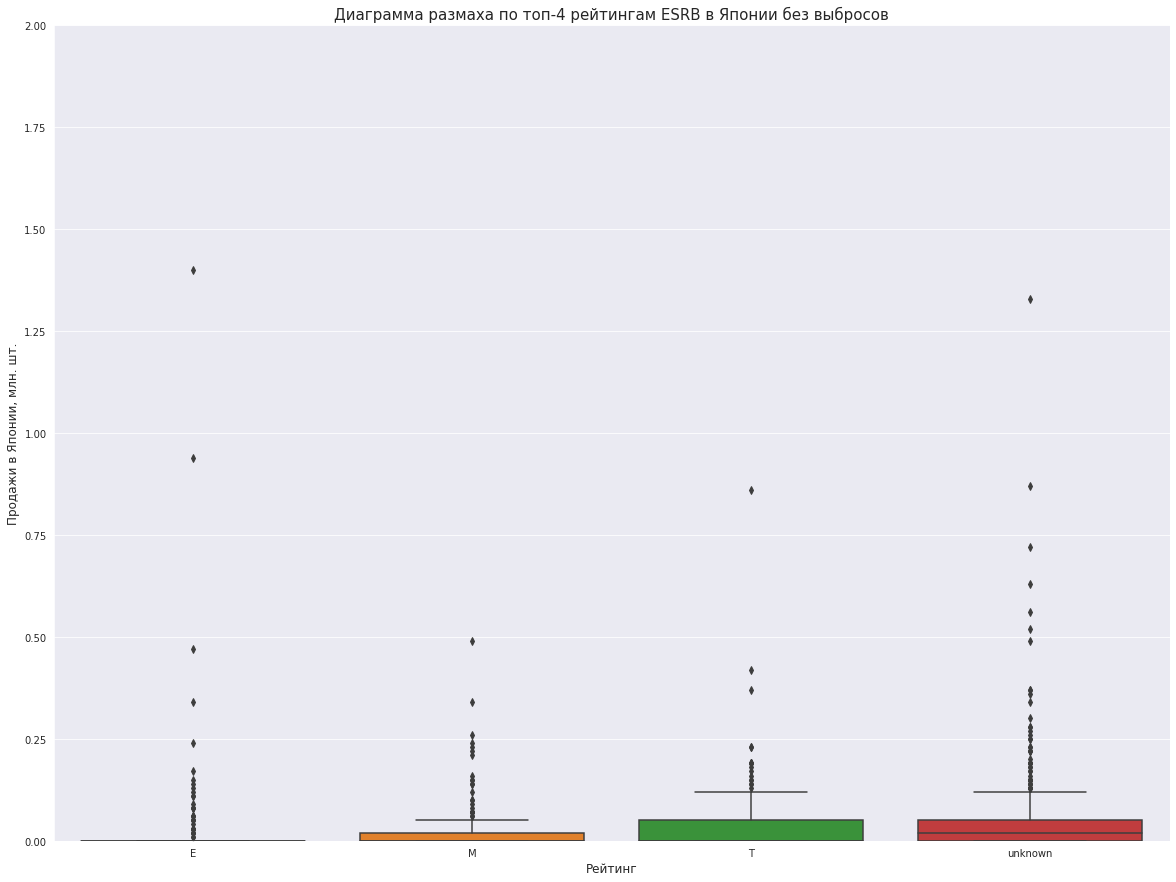

In [77]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) 
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='jp_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в Японии без выбросов', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в Японии, млн. шт.',fontsize=12)
plt.ylim(0, 2) # ограничим выбросы
plt.show()

#### В Японии рейтинги "Е"  и"М" на продажи игр имеют около 0 влияние.  Несколько большее влияние на продажи оказывает отсутствие рейтинга и рейтинг "Т".

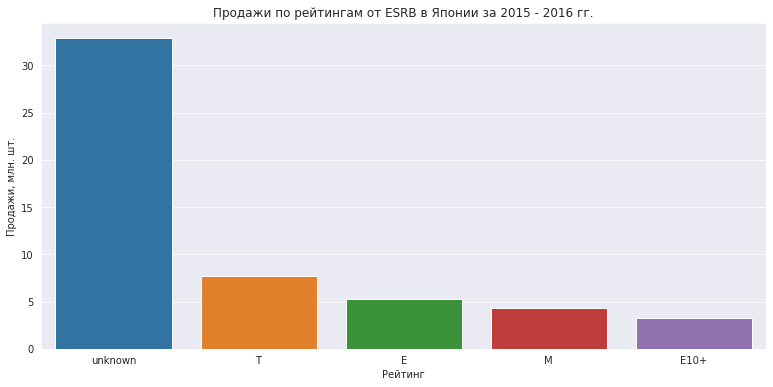

In [78]:
sample3 = data[data['year_of_release'] >= 2015]
sample3 = sample3.pivot_table(
                        index="rating",  
                        values="jp_sales", 
                        aggfunc=sum).sort_values(by='jp_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample3.index,y=sample3['jp_sales'])
plt.title("Продажи по рейтингам от ESRB в Японии за 2015 - 2016 гг.")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн. шт.")
plt.show()

#### Видим, что в Японии наибольшие продажи у игр с рейтингом 'unknown', "Т", «E» и "М". Большой отрыв продаваемых игр без рейтинга свидетельствуют о том, что японских игроков не сильно волнуют международные рейтинги.

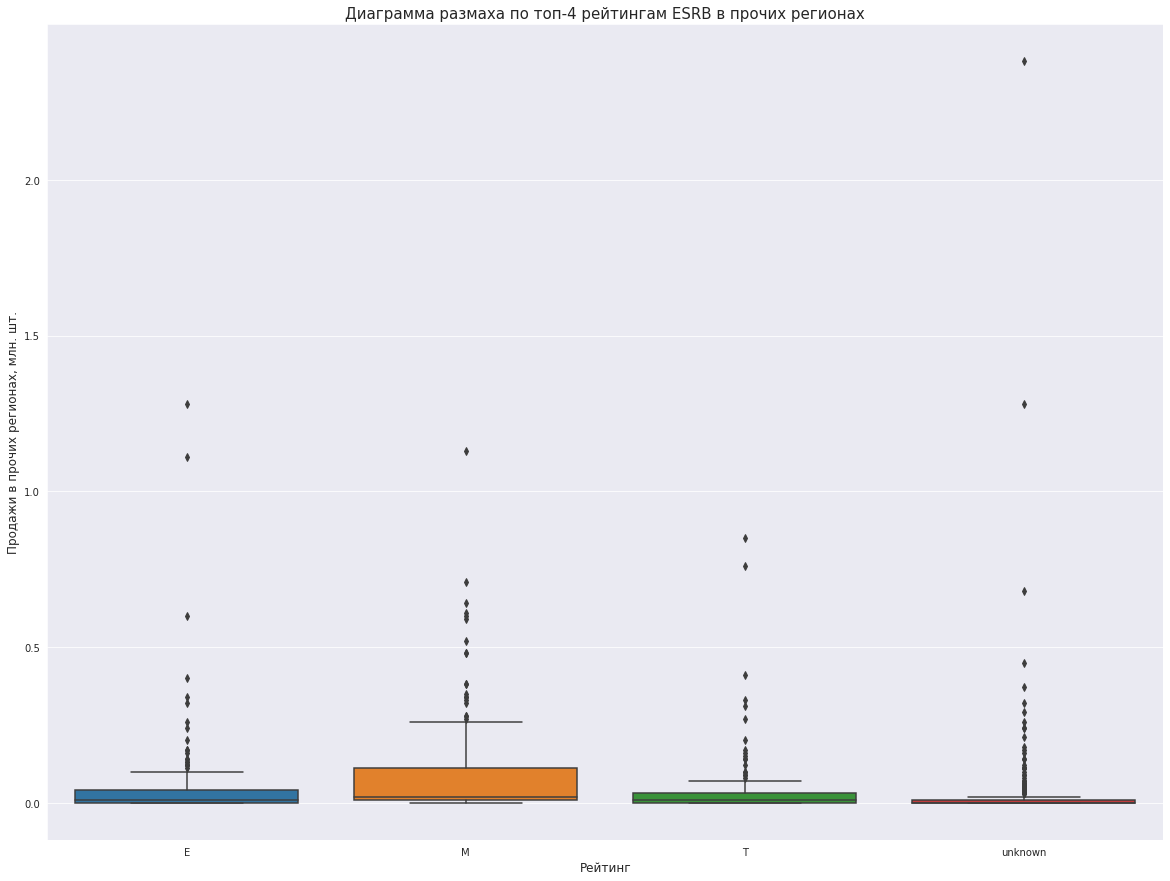

In [79]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) # построим общую диаграмму размаха по топ-4 рейтингам в прочих регионах
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='other_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в прочих регионах', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в прочих регионах, млн. шт.',fontsize=12)
plt.show()

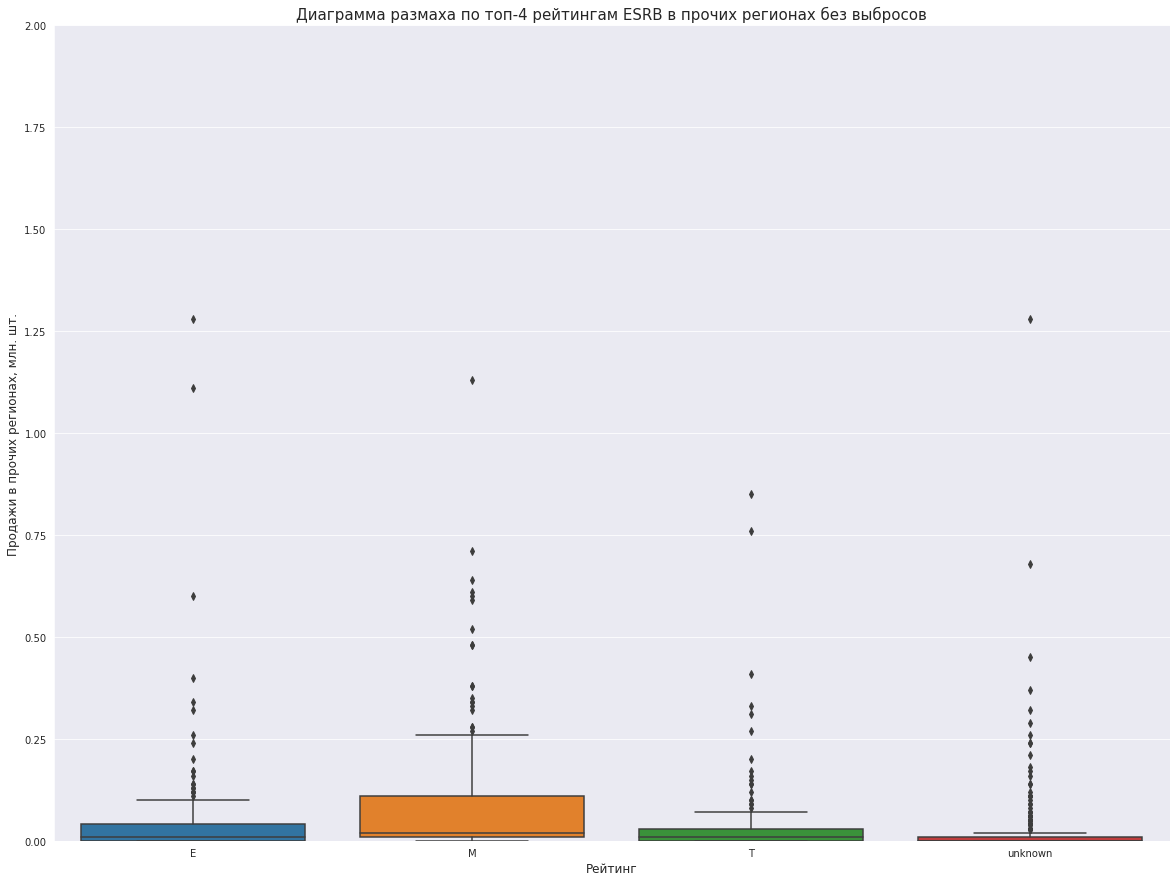

In [80]:
sample3 = data[data["year_of_release"] >= 2015]
plt.figure(figsize=(20,15)) 
sns.set_style('darkgrid')
sns.boxplot(data=sample3, x='rating',  y='other_sales', order=['E', 'M', 'T', 'unknown'])
plt.title('Диаграмма размаха по топ-4 рейтингам ESRB в прочих регионах без выбросов', fontsize=15)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Продажи в прочих регионах, млн. шт.',fontsize=12)
plt.ylim(0, 2) # ограничим выбросы
plt.show()

#### В прочих регионах тенденции схожи с Северной Америкой и Европой, только в несколько меньших масштабах. 

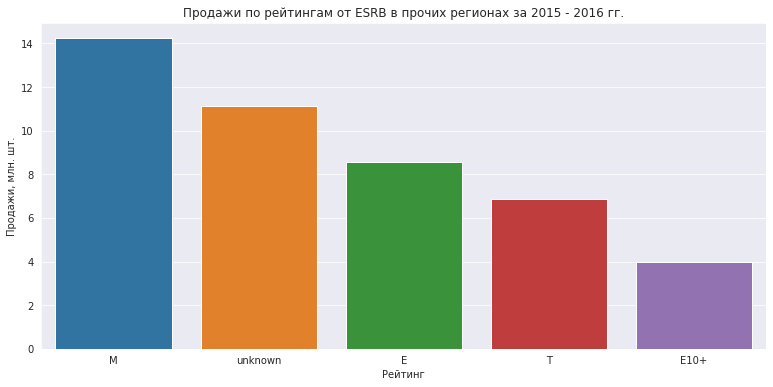

In [81]:
sample3 = data[data['year_of_release'] >= 2015]
sample3 = sample3.pivot_table(
                        index="rating",  
                        values="other_sales", 
                        aggfunc=sum).sort_values(by='other_sales', ascending=False)
plt.figure(figsize=(13,6))
sns.barplot(x=sample3.index,y=sample3['other_sales'])
plt.title("Продажи по рейтингам от ESRB в прочих регионах за 2015 - 2016 гг.")
plt.xlabel("Рейтинг")
plt.ylabel("Продажи, млн. шт.")
plt.show()

#### Видим, что в прочих регионах топ-4 рейтинговых продаж не отличается от североамериканского рынка:  "М" , 'unknown', «E»,  "Т" . 

### Вывод
<font color='blue'> 
Подведем итоги по ТОП-5 самых популярных платформ и жанров.

В 2015-2016 по объему продаж можно сказать, что рынки Северной Америки и Европы практически равны - 151,79 млн. копий (или 38,1% всего объема продаж) и 147,94 млн. копий (37,2%) соответственно. А также Япония - 53,40 млн. копий (13,42%) и прочие регионы - 44.79 млн. копий (11,26%).

Структура рынка продаж с учетом рейтинга от ESRB выглядит следующим образом:  'unknown' - 29%, «М» - 28%, "Е" - 19%, "Т" - 15% 

По использованию платформ наиболее близки портреты европейских, японских и игроков из прочих регионов. А по жанрам -  у североамериканских, европейских и игроков из прочих регионов.

Рейтинг по платформам:
1. в Северной Америке - PS4, XOne, 3DS, WiiU, Х360 
2. в Европе - PS4, XOne, PС, 3DS, PS3 
3. в Японии - 3DS, PS4, PSV, PS3, WiiU
4. в других странах - PS4, XOne, PS3, 3DS, WiiU

Распределение мест в каждом регионе индивидуальное. А вот наименование предпочтительных платформ в топ-5 совпадает у европейских, японских и игроков из прочих регионов в 4-х из 5-и случаев. Этот выбор на 2 платформы отличается от предпочтений севрероамериканских геймеров.

Рейтинг по жанрам:
1. в Северной Америке - Shooter, Action,  Sports,  Role-playing, Misc
2. в Европе - Shooter, Action,  Sports,  Role-playing, Racing
3. в Японии - Action, Role-Playing, Shooter, Misc, Adventure
4. в других странах - Shooter, Action,  Sports,  Role-playing, Fighting

По четырем первым местам жанров 100% совпадение интересов у североамериканских, европейских и игроков из прочих регионов. 

В Японии наблюдаются серьезные отличия по распределению мест и не значительные по предпочтениям в жанрах.

Продажи в зависимости от рейтинга организации ESRB:
1. в Северной Америке - М
2. в Европе - М
3. в Японии - жанр неопределён
4. в других странах - М

Как видим, в мире преобладает интерес к играм категории «M» («Mature» — «Для взрослых»). Здесь необходимо отметить, что ESRB - это официальная организация, которая определяют, кто сможет купить видеоигру, а кто — нет в Северной Америке.  Для получения рейтинга издатели добровольно присылают в ESRB видеоролики с наиболее впечатляющими и резкими сценами.

Поэтому далекоидущие выводы по этому рейтингу делать не стоит.</font> 

Вышесказанное более подробно расписано в процессе выгрузок.

## Проверим гипотезы

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action и Sports разные.

#### Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H_0: средний пользовательский рейтинг (user_score) Xbox One = среднему пользовательскому рейтингу (user_score) PC`

H_a: средний пользовательский рейтинг (user_score) Xbox One ≠ среднему пользовательскому рейтингу (user_score) PC`

alpha = 0.05

<font color='blue'>
У нас в тесте достаточно много наблюдений и в распределениях нет совсем уж длинных хвостов. Поэтому воспользуемся t-тестом для определения равенства средних двух генеральных совокупностей по двум выборкам. Пороговое значение `p-value` примем равным 5% или 0.05 (общепринятое пороговое значение). 

Выводы будут делаться на имеющихся данных </font> 

#### сделаем выборки по каждой платформе

In [82]:
XOne = data[(data['platform'] == 'XOne') & (data['user_score'] > 0)]['user_score']
PC = data[(data['platform'] == 'PC') & (data['user_score'] > 0)]['user_score']

print('средний пользовательский рейтинг (user_score) Xbox One:', XOne.mean())
print('средний пользовательский рейтинг (user_score) PC:', PC.mean())   

средний пользовательский рейтинг (user_score) Xbox One: 6.521428571428572
средний пользовательский рейтинг (user_score) PC: 7.065960264900661


In [89]:
var_PC=np.var(PC)
print('Дисперсия для платформы PC:',var_PC)

Дисперсия для платформы PC: 2.346112819613175


In [90]:
var_XOne=np.var(XOne)
print('Дисперсия для платформы PC:',var_XOne)

Дисперсия для платформы PC: 1.8965188383045526


#### <font color='blue'> определяем equal_var = False, т.к. дисперсия наших двух выборок не равна </font>

In [85]:
#проверяем гипотезу
alpha = .05
results = st.ttest_ind(XOne, PC, equal_var=False)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771835e-06
Отвергаем нулевую гипотезу


#### Нулевая гипотеза отвергнута. Средние значения двух генеральных выборок пользовательских рейтингов платформы XOne и PC не равны

#### Проверка гипотезы: средние пользовательские рейтинги жанров Action и Sports разные
H_0: средний пользовательский рейтинг (user_score) Action = среднему пользовательскому рейтингу (user_score) Sports`

H_a: средний пользовательский рейтинг (user_score) Action ≠ среднему пользовательскому рейтингу (user_score) Sports`

У нас в тесте достаточно много наблюдений и в распределениях нет длинных хвостов. Поэтому воспользуемся t-тестом для определения равенства средних двух генеральных совокупностей по двум выборкам. Пороговое значение p-value примем равным 5% или 0.05 (общепринятое пороговое значение).

Выводы будут делаться на имеющихся данных

#### сделаем выборки по каждой платформе

In [86]:
genre_Action = data[(data['genre'] == 'Action') & (data['user_score'] > 0)]['user_score'] 
genre_Sports = data[(data['genre'] == 'Sports') & (data['user_score'] > 0)]['user_score']
# убираем значения, которые были пропусками
# вывели две выборки по необходимым жанрам

print('средний пользовательский рейтинг (user_score) Action:', genre_Action.mean())
print('средний пользовательский рейтинг (user_score) Sports:', genre_Sports.mean())

средний пользовательский рейтинг (user_score) Action: 7.058129175946549
средний пользовательский рейтинг (user_score) Sports: 6.951433857539316


In [87]:
var_Action=np.var(genre_Action)
print('Дисперсия для платформы PC:',var_Action)

Дисперсия для платформы PC: 2.0263648741821716


In [88]:
var_Sports=np.var(genre_Sports)
print('Дисперсия для платформы PC:',var_Sports)

Дисперсия для платформы PC: 2.6206293039045456


#### определяем equal_var = False, т.к. дисперсия наших двух выборок не равна 

In [91]:
alpha = 0.05 #  значение уровня значимости

results = st.ttest_ind(genre_Action.dropna(), genre_Sports.dropna(), equal_var = False) #  вызов метода для проверки гипотезы

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278526
Не получилось отвергнуть нулевую гипотезу


#### Нулевая гипотеза не опровергнута. Средние значения двух генеральных выборок пользовательских рейтингов жанров Action и Sports равны

## Общий вывод



#### В исследуемом периоде (1980-2016 гг.) до середины 90-х годов продавалось с переменным успехом до 100 млн. игр ежегодно. Далее до 2008г. виден кратный рост спроса на консольные игры в пиком до 700 млн. игр за год. И с 2009 г. нисходящий тренд до 130 млн. игр за 2016 г.

Возможно с 2008 г. консольные игры начали ощущать все более возрастающую конкуренцию не только со стороны ПК, но и мобильных игр.

Тенденции продаж североамериканского, европейского и прочих рынков схожи, а вот спады и пики продаж на японском рынке не всегда повторяют общемировые тенденции.

Безусловный лидер продаж за 21 год - платформа PS2, расцвет которой пришелся на 2002-2004 гг. Всего платформа на рынке просуществовала 12 лет и было продано 1,2 млрд. копий.

Чуть менее коммерчески успешными стали такие платформы как X360, PS3, WII, DS, PS. Продажи составили от 728 млн. до 961 млн. копий. Итоговые продажи по остальным платформам составили менее 314 млн. копий.

Cамые продаваемые - это Sony Play Station и XBOX 360. Nintento WII резко стартовал в 2006-2009 годах и так же резко упал

У 6 наиболее коммерчески успешных платформ пик продаж наступил через 4-6 лет после выхода приставки

Практически все игровые платформы в среднем существуют по 9-12 лет.

Обращает на себя внимание самая "долгоиграющая" платформа РС, не самая продаваемая, но имеющая свой стабильный фанклуб.

В 2016 г. все без исключения платформы показали спад продаж.

<font color='blue'> 
Для прогноза мы взяли период с 2015 г., т.к. это очень динамично меняющаяся индустрия. 

Можно отметить платформы PS4 и XOne, которые хотя и прошли пик популярности в 2015 г., но потенциально несколько лет еще будут пользоваться спросом. А также платформу PC, продажи которой с разной степенью успешности происходили на протяжении 21 года. Что подчеркивает ее уникальность.

По платформам PS_4 и XOne покупатели слабо прислушиваются к критикам и не прислушиваются к рейтингам игроков. Количество продаж умеренно зависит от оценок критиков.

По РС - покупатели слабо прислушиваются и к критикам и к рейтингам игроков. Здесь количество продаж практически не зависит от оценок.

За 2015-2016 гг. ТОП-5 жанров в мире выглядят так:
1. Shooter
2. Action
3. Sports
4. Role-Playing
5. Misc

Лучше всего продаются игры в жанре Экшн (Shooter и Action) - 53% всех продаж. Хуже всех - Загадки и Стратегии.
    
Вывод по жанру "Shooter" подтверждается также средними значениями и медианой. А вот на 2 и 3 местах по продажам игры в жанре "Sports" и "Role-Playing".

Рейтинг по платформам в разрезе регионального портрета пользователя выглядит так:
1. в Северной Америке - PS4, XOne, 3DS, WiiU, Х360 
2. в Европе - PS4, XOne, PС, 3DS, PS3 
3. в Японии - 3DS, PS4, PSV, PS3, WiiU
4. в других странах - PS4, XOne, PS3, 3DS, WiiU

Распределение мест в каждом регионе индивидуальное. А вот наименование предпочтительных платформ в топ-5 совпадает у европейских, японских и игроков из прочих регионов в 4-х из 5-и случаев. Этот выбор на 2 платформы отличается от предпочтений севрероамериканских геймеров.

Рейтинг по жанрам в разрезе регионального портрета пользователя выглядит так:
1. в Северной Америке - Shooter, Action,  Sports,  Role-playing, Misc
2. в Европе - Shooter, Action,  Sports,  Role-playing, Racing
3. в Японии - Action, Role-Playing, Shooter, Misc, Adventure
4. в других странах - Shooter, Action,  Sports,  Role-playing, Fighting

По четырем первым местам жанров 100% совпадение интересов у североамериканских, европейских и игроков из прочих регионов. 
В Японии наблюдаются серьезные отличия по распределению мест и не значительные по предпочтениям в жанрах.


Распределение продаж игр в зависимости от рейтинга организации ESRB:
1. в Северной Америке - М
2. в Европе - М
3. в Японии - жанр неопределён
4. в других странах - М

Как видим, в мире преобладает интерес к играм категории «M» («Mature» — «Для взрослых»).

Таким образом, мы веделяем следующие закономерности:
1. В 2015-2016 гг. рынок сужается, что в дальнейшем приведет к ужесточению конкуренции и/или банкротствам отдельных производителей.
2. Лидер рынка - компания Sony.
3. Пик продаж платформ наступает через 4-6 лет после выхода приставки. Жизненный цикл платформы - в среднем 9-12 лет.
4. В лучшем случае покупатели умеренно прислушиваются к рейтингам критиков и не прислушиваются к рейтингам игроков.
5. Портрет покупателей в разрезе жанров очень похож, в разрезе платформ - отличается распределением мест по платформам, однако по наименованиям различия минимальны. В Японии имеется больше национальной специфики с тяготением к японским производителям игр. Эти факторы можно и нужно учитывать при планировании рекламных компаний.
6. В мире преобладает интерес к играм категории «M» («Mature» — «Для взрослых»).
7. В 2017 г. по нашему мнению наилучшие продажи будут у платформ PS4, XOne и PC. </font> 
